# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [49]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
('Distance matrix:\n', array([[    0.        ,   666.10809934,   281.11385594, ...,
          217.08293346,   789.38267019,  1220.46097848],
       [  666.10809934,     0.        ,   649.32657423, ...,
          596.25917184,  1421.55724471,  1716.04924172],
       [  281.11385594,   649.32657423,     0.        , ...,
          463.24939288,   995.3140208 ,  1483.59361012],
       ..., 
       [  217.08293346,   596.25917184,   463.24939288, ...,
            0.        ,   829.60834133,  1150.76061803],
       [  789.38267019,  1421.55724471,   995.3140208 , ...,
          829.60834133,     0.        ,   624.81997407],
       [ 1220.46097848,  1716.04924172,  1483.59361012, ...,
         1150.76061803,   624.81997407,     0.        ]]))
('Optimal solution:\n', [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21])


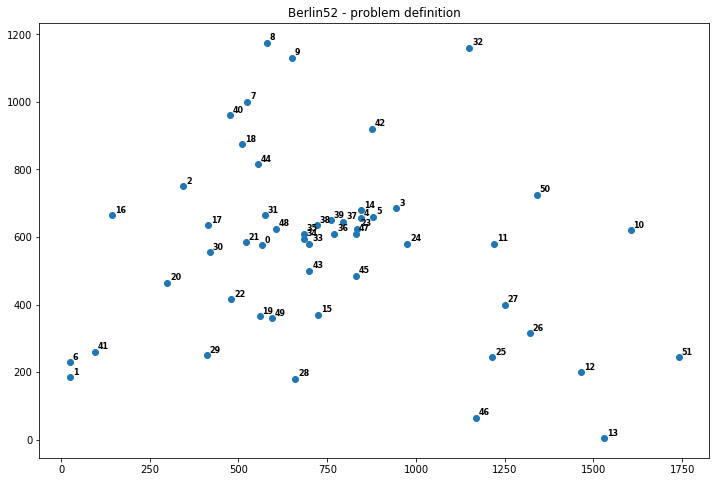

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

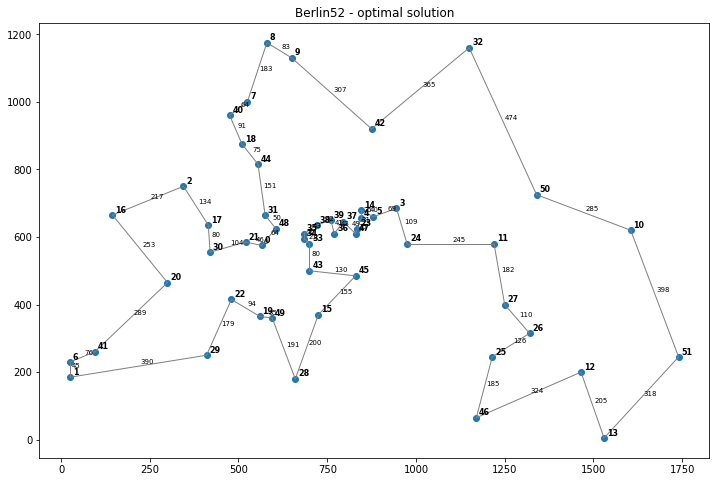

In [6]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [31]:
def tsp_objective_function(p):
    return A[p[:-1], p[1:]].sum() + A[p[-1],p[0]]

In [28]:
print(tsp_objective_function(p), p)

(22106.873217068372, array([ 8, 46, 27, 24, 43, 23,  0, 22, 15, 13, 51,  6, 26,  1, 41,  2,  9,
       16, 35, 48, 10, 11,  3, 36, 29, 14,  5, 45,  4, 28, 19, 21, 31, 20,
       17, 38, 34,  7, 18, 40, 33, 30, 49, 37, 44, 50, 12, 25, 47, 39, 42,
       32]))


## Random Sampling

In [17]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

39.8431560993
(19828.9231982694, array([14, 36,  2, 42, 47,  4, 18, 33, 20, 22, 35,  8, 40, 44, 29, 30,  6,
        1, 24, 39,  9, 28,  0, 16, 23, 15, 19, 49, 21, 43, 11, 45, 26, 37,
        5, 32, 50, 10, 12, 27, 51, 13, 46, 25, 38, 48,  7, 17, 34, 41, 31,
        3]))


40.1825389862
(21808.383747427586, array([ 9,  7,  8, 23, 29, 19, 15, 25, 46, 26, 14, 28, 49, 41, 34, 20, 42,
        3, 45, 48, 39, 37,  1, 33, 30, 27, 16, 36,  4,  0, 22, 21, 17, 31,
       40, 43,  6, 38, 50, 10, 13, 12, 51,  5, 35, 11, 24, 44,  2, 18, 47,
       32]))


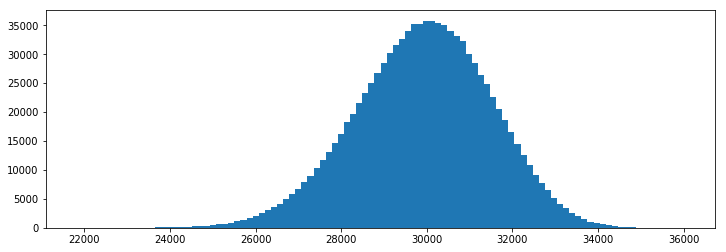

(29914.051595340756, 1580.5342969337466)
41.5542621613
(21510.602695857782, array([32, 40, 19, 43, 17, 37, 12, 26, 15, 34, 11, 50,  8,  9, 45, 49, 35,
       38, 30, 21,  6, 14, 41,  1, 16, 29, 48, 23, 25, 46, 28, 33, 22, 18,
       20, 31,  2, 39, 10, 27, 51, 13,  3,  4,  0, 36, 44, 47,  5, 42,  7,
       24]))


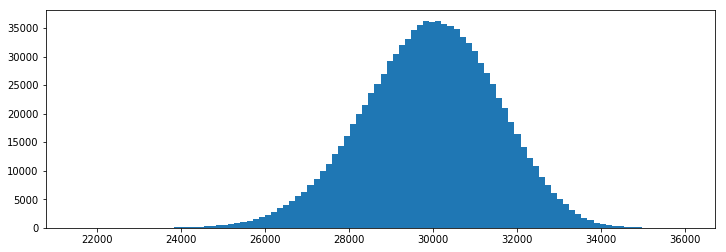

(29914.418323423295, 1579.0619567521906)
41.0991089344
(21808.257044709007, array([40, 29, 26, 27, 32, 14, 37, 45, 31,  7, 28, 20, 15, 30, 23, 49,  1,
        6, 19,  8,  5, 46, 50, 51, 12, 13, 25, 43, 24,  3, 38, 11, 10, 39,
       16,  9, 44,  2, 36, 33, 21, 17, 34, 18, 48,  0, 22, 47,  4, 42, 41,
       35]))


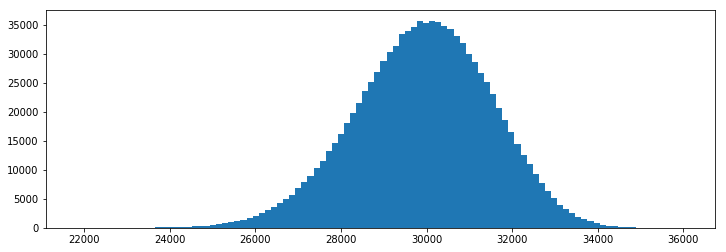

(29915.732346324636, 1578.2335292731793)
41.5967550278
(21195.68963821802, array([ 0, 37,  4, 19, 41, 16, 20, 12, 13, 46, 51, 45, 48, 30,  5, 47, 35,
       49, 33, 43, 40, 21,  7,  1,  6, 10, 25,  2, 39, 42,  8,  9, 31, 23,
       14, 24,  3, 34, 26, 38, 28, 29, 44, 36, 15, 22, 17, 18, 32, 50, 27,
       11]))


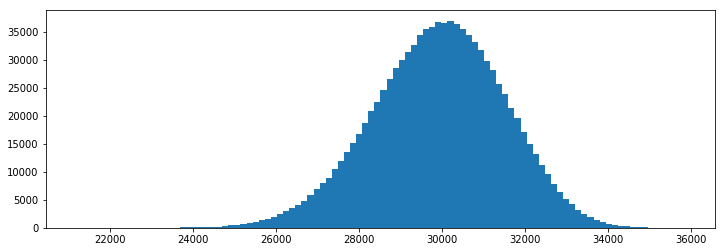

(29915.472564910458, 1577.3805521733332)
41.1789870262
(21427.188934045305, array([24, 32, 40,  0, 37, 16, 20, 15, 22, 18,  2, 33, 42, 50, 10, 11, 34,
        7,  9, 43, 35,  3, 51, 23, 12, 46, 28, 49,  1,  6, 30, 17, 29, 48,
       31, 41,  8, 38, 14, 39,  4, 47, 21, 27, 13, 25,  5, 19, 44, 36, 45,
       26]))


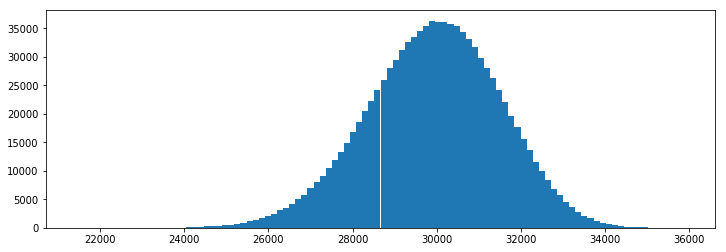

(29915.976584450949, 1579.9064393537426)


In [226]:
for _ in range(5):
    t0 = time.time()

    T = 1000000

    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = tsp_objective_function2(permutations[i, :])

    print(time.time() - t0)

    p = permutations[costs.argmin(), :]
    print(tsp_objective_function(p), p)
    
    plt.figure(figsize=(12,4))
    plt.hist(costs, bins=100)
    plt.show()

    print(costs.mean(), costs.std())

## Simulated Annealing

In [3]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

(29.986807107925415, 8460.5108044578647)


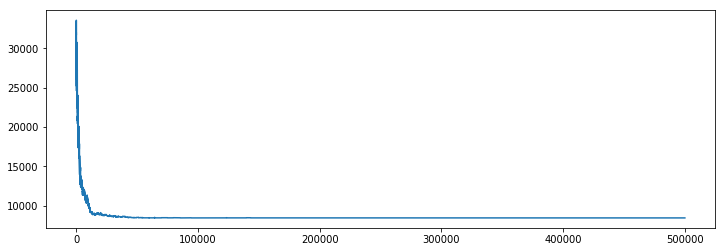

(29.627815008163452, 8930.4154789044369)


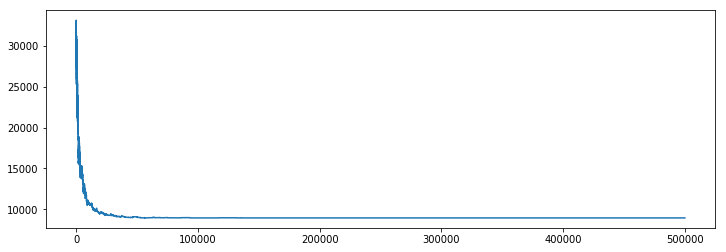

(29.49662208557129, 8843.9931363907908)


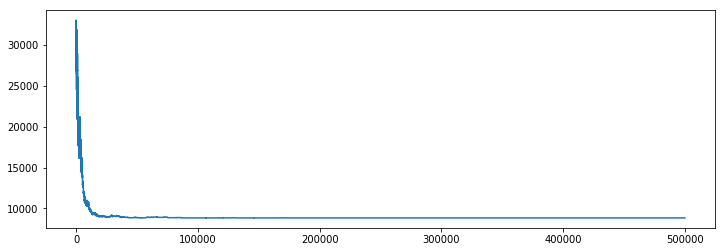

(30.52271819114685, 8257.7689241956086)


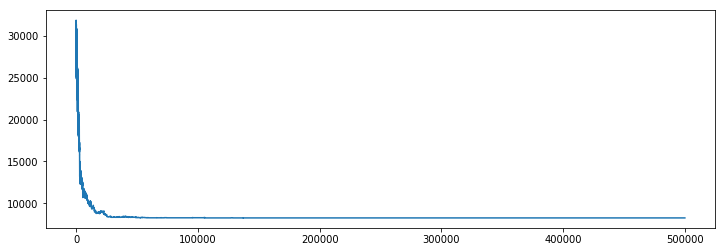

(31.011038064956665, 8430.3105002994853)


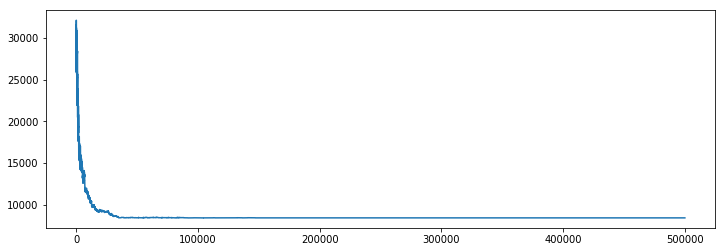

In [228]:
for _ in range(5):
    T = 500000
    radius = 1
    alpha = 1.0

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

## SGA-PMX

In [32]:
def PMX(ind1, ind2):
    group_len = np.random.randint(1, max_group_len)
    sep1 = np.random.randint(0, ind1.shape[0]-group_len+1)
    sep2 = sep1 + group_len
    group1 = ind1[sep1:sep2]
    group2 = ind2[sep1:sep2]
    
    for idx, g2 in enumerate(group2):
        ind1[ind1 == g2] = ind1[sep1+idx]
        ind1[sep1+idx] = g2
        
    for idx, g1 in enumerate(group1):
        ind2[ind2 == g1] = ind2[sep1+idx]
        ind2[sep1+idx] = g1
                
    return ind1, ind2

def OX(ind1, ind2):
    group_len = np.random.randint(1, max_group_len)
    sep1 = np.random.randint(0, ind1.shape[0]-group_len+1)
    sep2 = sep1 + group_len
    group1 = ind1[sep1:sep2]
    group2 = ind2[sep1:sep2]
    
    fill_seq1 = np.setdiff1d(ind2, group1)
    fill_seq2 = np.setdiff1d(ind1, group2)
    
    ind1[:sep1] = fill_seq1[:sep1]
    ind1[sep2:] = fill_seq1[sep1:]
    
    ind2[:sep1] = fill_seq2[:sep1]
    ind2[sep2:] = fill_seq2[sep1:]
    
    return ind1, ind2

def OX2(ind1, ind2):
    group_len = np.random.randint(1, max_group_len)
    sep1 = np.random.randint(0, ind1.shape[0]-group_len+1)
    sep2 = sep1 + group_len
    group1 = ind1[sep1:sep2]
    group2 = ind2[sep1:sep2]
    
    fill_seq1 = np.hstack([np.array([]), ind1[sep2:], ind1[:sep1]])
    fill_seq2 = np.hstack([np.array([]), ind2[sep2:], ind2[:sep1]])
    
    fill_seq1 = np.setdiff1d(fill_seq1, group1)
    fill_seq2 = np.setdiff1d(fill_seq2, group2)
    
    ind1[:sep1] = fill_seq1[:sep1]
    ind1[sep2:] = fill_seq1[sep1:]
    
    ind2[:sep1] = fill_seq2[:sep1]
    ind2[sep2:] = fill_seq2[sep1:]
    
    return ind1, ind2

def CX(ind1, ind2):
    
    child1, child2 = np.ones_like(ind1)*(-1), np.ones_like(ind2)*(-1)
    
    child1[0], child2[0] = ind1[0], ind2[0]
    i = 0
    while True:
        j = 0
        while ind1[j] != ind2[i]:
            j += 1
        
        child1[j], child2[j] = ind1[j], ind2[j] 
        i = j
        
        if (child1 == ind1[i]).any(): break
            
    child1[child1 == -1] = ind1[child1 == -1]
    child2[child2 == -1] = ind2[child2 == -1]
    
    return child1, child2


In [33]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

def transpose_sequence_mutation(p):
    q = p.copy()
    idx1, idx2 = np.random.randint(0, len(p)), np.random.randint(0, len(p))
    temp = q[idx1]
    q[idx1] = q[idx2]
    q[idx2] = temp
    return q

import itertools as it
K=2


good_permutations = [ \
    [np.array(perm) for perm in it.permutations(range(k+2)) if not any(perm[i] == i for i in range(k+2))] \
                     for k in range(5)]

def local_sequence_mutation(p, cost_function):
    best_p = p.copy()
    best_p_objective_function = cost_function(best_p)
    for k in range(2, K+1):
        for ind in it.combinations(range(p.shape[0]), k):
            ind = np.array(ind)
            for perm in good_permutations[k-2]:
                new_p = p.copy()
                perm_ind = ind[perm]
                new_p[ind] = new_p[perm_ind]
                if cost_function(new_p) < best_p_objective_function:
                    best_p = new_p
                    best_p_objective_function = cost_function(new_p)
    
    return best_p

def local_iterative_sequence_mutation(p, cost_function):
    best_p = p.copy()
    best_p_objective_function = cost_function(best_p)
    updated = True
    
    while updated:
        updated = False
        for k in range(2, K+1):
            for ind in it.combinations(range(p.shape[0]), k):
                ind = np.array(ind)
                for perm in good_permutations[k-2]:
                    new_p = p.copy()
                    perm_ind = ind[perm]
                    new_p[ind] = new_p[perm_ind]
                    if cost_function(new_p) < best_p_objective_function:
                        updated = True
                        best_p = new_p
                        best_p_objective_function = cost_function(new_p)
        p = best_p
    
    return best_p


In [34]:
def average_costs(costs_list):
    costs = np.vstack(costs_list).mean(axis=0)
    return costs

In [35]:
def SGA(ppl_size, iters, crossover_ppb, mutation_ppb, local_mutation_ppb=0.0, cross=PMX, local_iterative=False, \
       cost_function=tsp_objective_function, n=None, mutation_function=reverse_sequence_mutation):
    
    if n == None:
        n = A.shape[0]
        
    population_size = ppl_size
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = crossover_ppb
    mutation_probability = mutation_ppb
    number_of_iterations = iters
    costs = np.zeros(number_of_iterations)
    
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = cost_function(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
        #ranking = np.argsort(fitness_values)
        #fitness_values = 0.5 + (np.arange(population_size).astype(float)/(population_size-1))
        #fitness_values = fitness_values[ranking]/population_size
        #parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
        
        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = cross(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_function(children_population[i, :])
                
        for i in range(number_of_offspring):
            random_ppb = np.random.random() 
            if random_ppb < local_mutation_ppb and not local_iterative:
                children_population[i, :] = local_sequence_mutation(children_population[i, :], cost_function)
            elif random_ppb < local_mutation_ppb and local_iterative:
                children_population[i, :] = local_iterative_sequence_mutation(children_population[i, :], cost_function)

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = cost_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        
        costs[t] = objective_values.min()
        #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

    return costs

# Berlin52

Optimum = 7542
('time', 45.52379608154297)
max_group_len = 2, Average min = 8240
minimums: [7973.3755171888515, 8103.226836609575, 8377.2057908142797, 8175.9683953595213, 8652.302796363816, 7953.9446472062291, 8039.4873347615094, 8630.3270226213772, 8066.9166848510631, 8434.109295307826]
total min = 7953.94464721


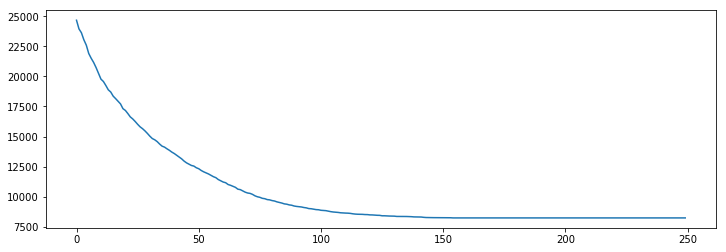

In [50]:
print("Optimum = 7542")
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(10):
        cost_list.append(SGA(ppl_size=1000, crossover_ppb=0.95, mutation_ppb=0.25, iters=250))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Zad1 d) transpose mutation

('time', 45.453882932662964)
max_group_len = 2, Average min = 8084
minimums: [7780.4132367347693, 8054.1276853801191, 8028.8406453196476, 7765.555446960986, 8329.1889630883325, 7922.1585839128174, 8032.7476975689324, 8212.7880202946562, 8364.640831616829, 8349.9496876741796]
total min = 7765.55544696


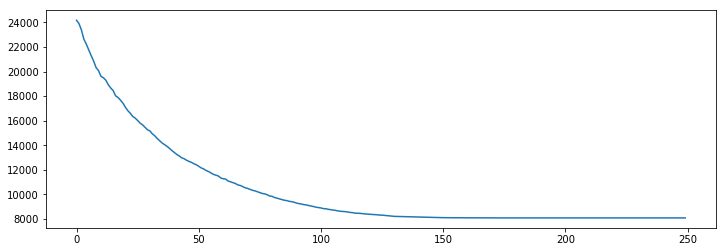

In [51]:
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(10):
        cost_list.append(SGA(ppl_size=1000, crossover_ppb=0.95, mutation_ppb=0.25, iters=250))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Zad1 e) Bayg29

In [52]:
# BAYG29

n = 29
print('Problem size: %d' % n)


weights_string = """97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145
129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74
219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60
167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173
 51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69
279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120
178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331
169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210
172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90
140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135
320 146  64  68 143 106  88  81 159 219  63 216 187  88 293 191 258 272
174 311 258 196 347 288 243 192 113 345 222 144 274 124 165  71 153
144  86  57 189 128  71  71  82 176 150  56 114 168  83 115 160
 61 165  51  32 105 127 201  36 254 196 136 260 212 258 234
106 110  56  49  91 153  91 197 136  94 225 151 201 205
215 159  64 126 128 190  98  53  78 218  48 127 214
 61 155 157 235  47 305 243 186 282 261 300 252
105 100 176  66 253 183 146 231 203 239 204
113 152 127 150 106  52 235 112 179 221
 79 163 220 119 164 135 152 153 114
236 201  90 195  90 127  84  91
273 226 148 296 238 291 269
112 130 286  74 155 291
130 178  38  75 180
281 120 205 270
213 145  36
 94 217
162"""

A = np.zeros((n, n))

for row, line in enumerate(weights_string.splitlines()):
    for col, dist in enumerate([int(dist) for dist in line.split()]):
        A[row, col+row+1] = dist
        A[col+row+1, row] = dist
print("Optimum distance: 1610")
#print('Distance matrix:\n', A)        

Problem size: 29
Optimum distance: 1610


('time', 22.650696992874146)
max_group_len = 2, Average min = 1670
minimums: [1746.0, 1694.0, 1643.0, 1642.0, 1646.0, 1646.0, 1642.0, 1643.0, 1628.0, 1779.0]
total min = 1628.0


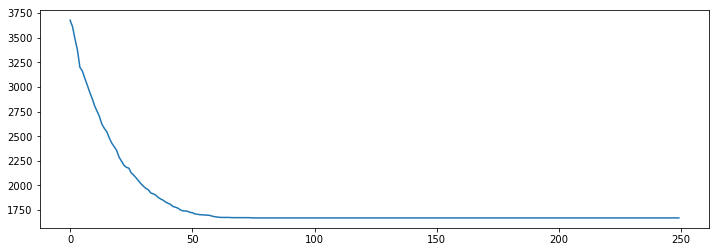

In [53]:
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(10):
        cost_list.append(SGA(ppl_size=500, crossover_ppb=0.95, mutation_ppb=0.25, iters=250))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Zad1 BAYS29

In [54]:
# BAYG29

n = 29
print('Problem size: %d' % n)


weights_string = """0 107 241 190 124  80 316  76 152 157 283 133 113 297 228 129 348 276 188 150  65 341 184  67 221 169 108  45 167
 107   0 148 137  88 127 336 183 134  95 254 180 101 234 175 176 265 199 182  67  42 278 271 146 251 105 191 139  79
 241 148   0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356 355 204 182 435 417 292 424 116 337 273  77
 190 137 374   0 202 234 222 192 248  42 117 287  79 107  38 121 152  86  68  70 137 151 239 135 137 242 165 228 205
 124  88 171 202   0  61 392 202  46 160 319 112 163 322 240 232 314 287 238 155  65 366 300 175 307  57 220 121  97
  80 127 259 234  61   0 386 141  72 167 351  55 157 331 272 226 362 296 232 164  85 375 249 147 301 118 188  60 185
 316 336 509 222 392 386   0 233 438 254 202 439 235 254 210 187 313 266 154 282 321 298 168 249  95 437 190 314 435
  76 183 317 192 202 141 233   0 213 188 272 193 131 302 233  98 344 289 177 216 141 346 108  57 190 245  43  81 243
 152 134 217 248  46  72 438 213   0 206 365  89 209 368 286 278 360 333 284 201 111 412 321 221 353  72 266 132 111
 157  95 232  42 160 167 254 188 206   0 159 220  57 149  80 132 193 127 100  28  95 193 241 131 169 200 161 189 163
 283 254 491 117 319 351 202 272 365 159   0 404 176 106  79 161 165 141  95 187 254 103 279 215 117 359 216 308 322
 133 180 312 287 112  55 439 193  89 220 404   0 210 384 325 279 415 349 285 217 138 428 310 200 354 169 241 112 238
 113 101 280  79 163 157 235 131 209  57 176 210   0 186 117  75 231 165  81  85  92 230 184  74 150 208 104 158 206
 297 234 391 107 322 331 254 302 368 149 106 384 186   0  69 191  59  35 125 167 255  44 309 245 169 327 246 335 288
 228 175 412  38 240 272 210 233 286  80  79 325 117  69   0 122 122  56  56 108 175 113 240 176 125 280 177 266 243
 129 176 349 121 232 226 187  98 278 132 161 279  75 191 122   0 244 178  66 160 161 235 118  62  92 277  55 155 275
 348 265 422 152 314 362 313 344 360 193 165 415 231  59 122 244   0  66 178 198 286  77 362 287 228 358 299 380 319
 276 199 356  86 287 296 266 289 333 127 141 349 165  35  56 178  66   0 112 132 220  79 296 232 181 292 233 314 253
 188 182 355  68 238 232 154 177 284 100  95 285  81 125  56  66 178 112   0 128 167 169 179 120  69 283 121 213 281
 150  67 204  70 155 164 282 216 201  28 187 217  85 167 108 160 198 132 128   0  88 211 269 159 197 172 189 182 135
  65  42 182 137  65  85 321 141 111  95 254 138  92 255 175 161 286 220 167  88   0 299 229 104 236 110 149  97 108
 341 278 435 151 366 375 298 346 412 193 103 428 230  44 113 235  77  79 169 211 299   0 353 289 213 371 290 379 332
 184 271 417 239 300 249 168 108 321 241 279 310 184 309 240 118 362 296 179 269 229 353   0 121 162 345  80 189 342
  67 146 292 135 175 147 249  57 221 131 215 200  74 245 176  62 287 232 120 159 104 289 121   0 154 220  41  93 218
 221 251 424 137 307 301  95 190 353 169 117 354 150 169 125  92 228 181  69 197 236 213 162 154   0 352 147 247 350
 169 105 116 242  57 118 437 245  72 200 359 169 208 327 280 277 358 292 283 172 110 371 345 220 352   0 265 178  39
 108 191 337 165 220 188 190  43 266 161 216 241 104 246 177  55 299 233 121 189 149 290  80  41 147 265   0 124 263
  45 139 273 228 121  60 314  81 132 189 308 112 158 335 266 155 380 314 213 182  97 379 189  93 247 178 124   0 199
 167  79  77 205  97 185 435 243 111 163 322 238 206 288 243 275 319 253 281 135 108 332 342 218 350  39 263 199   0"""

A = np.zeros((n, n))

for row, line in enumerate(weights_string.splitlines()):
    for col, dist in enumerate([int(dist) for dist in line.split()]):
        A[row, col] = dist
print("Optimum distance: 2020")
#print('Distance matrix:\n', A)        

Problem size: 29
Optimum distance: 2020


PBX crossover
('time', 67.73814296722412)
max_group_len = 2, Average min = 2091
minimums: [2082.0, 2155.0, 2033.0, 2259.0, 2149.0, 2092.0, 2089.0, 2075.0, 2064.0, 2091.0, 2100.0, 2158.0, 2064.0, 2142.0, 2046.0, 2034.0, 2116.0, 2102.0, 2033.0, 2104.0, 2046.0, 2026.0, 2070.0, 2033.0, 2180.0, 2116.0, 2067.0, 2096.0, 2035.0, 2081.0]
total min = 2026.0


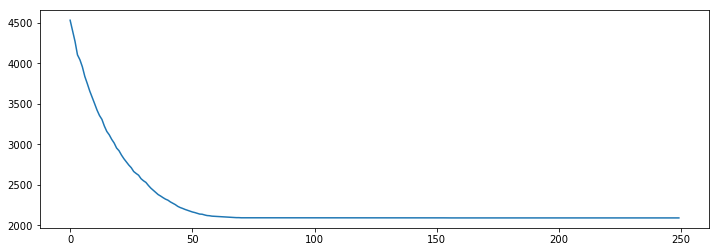

In [57]:
print("PBX crossover")
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(30):
        cost_list.append(SGA(ppl_size=500, crossover_ppb=0.95, mutation_ppb=0.25, iters=250))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    

PBX crossover + local mutation
('time', 134.8104169368744)
max_group_len = 2, Average min = 2057
minimums: [2020.0, 2060.0, 2078.0, 2065.0, 2066.0, 2144.0, 2078.0, 2034.0, 2065.0, 2034.0, 2020.0, 2052.0, 2069.0, 2046.0, 2098.0, 2034.0, 2028.0, 2074.0, 2020.0, 2100.0, 2107.0, 2073.0, 2028.0, 2068.0, 2052.0, 2052.0, 2034.0, 2020.0, 2045.0, 2068.0]
total min = 2020.0


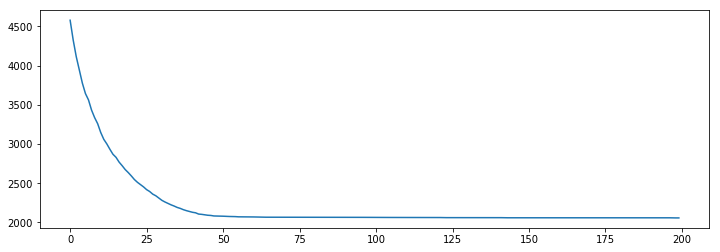

In [58]:
print("PBX crossover + local mutation")
K = 2
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(30):
        cost_list.append(SGA(ppl_size=200, crossover_ppb=0.95, mutation_ppb=0.25, local_mutation_ppb=0.04, iters=200))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()


PBX crossover + local iterative mutation
('time', 161.88607501983643)
max_group_len = 2, Average min = 2049
minimums: [2056.0, 2072.0, 2053.0, 2060.0, 2026.0, 2035.0, 2026.0, 2065.0, 2060.0, 2034.0, 2034.0, 2048.0, 2046.0, 2056.0, 2046.0, 2033.0, 2088.0, 2065.0, 2035.0, 2062.0, 2078.0, 2091.0, 2033.0, 2033.0, 2028.0, 2026.0, 2078.0, 2060.0, 2020.0, 2026.0]
total min = 2020.0


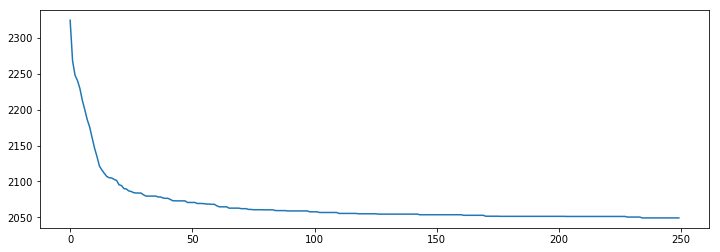

('time', 224.50577211380005)
max_group_len = 2, Average min = 2033
minimums: [2033.0, 2028.0, 2028.0, 2026.0, 2020.0, 2020.0, 2028.0, 2046.0, 2033.0, 2033.0, 2035.0, 2051.0, 2034.0, 2020.0, 2067.0, 2046.0, 2035.0, 2046.0, 2020.0, 2033.0, 2033.0, 2056.0, 2035.0, 2026.0, 2028.0, 2020.0, 2020.0, 2026.0, 2056.0, 2033.0]
total min = 2020.0


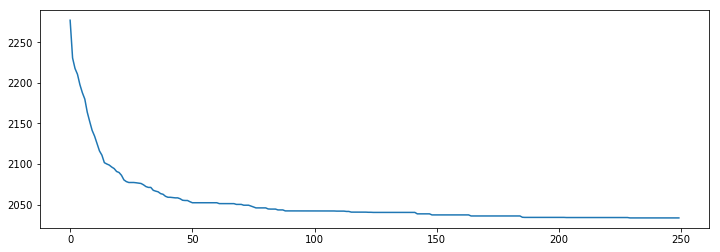

('time', 293.2496738433838)
max_group_len = 2, Average min = 2045
minimums: [2045.0, 2072.0, 2045.0, 2026.0, 2046.0, 2046.0, 2060.0, 2092.0, 2046.0, 2020.0, 2033.0, 2045.0, 2020.0, 2028.0, 2059.0, 2020.0, 2046.0, 2033.0, 2072.0, 2026.0, 2088.0, 2056.0, 2065.0, 2056.0, 2072.0, 2020.0, 2026.0, 2060.0, 2020.0, 2034.0]
total min = 2020.0


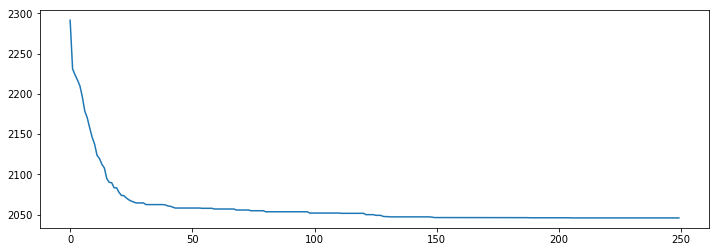

In [59]:
print("PBX crossover + local iterative mutation")
K = 2
for mgl in [2]:
    for lmp in [0.02, 0.03, 0.04]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(30):
            cost_list.append(SGA(ppl_size=200, crossover_ppb=0.95, mutation_ppb=0.25, local_mutation_ppb=lmp, local_iterative=True, iters=250))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        

Cycle crossover
max_group_len = 10, Average min = 2067
Mutation ppb = 0.250000, Crossover ppb = 0.950000
('time', 76.68802499771118)
minimums: [2116.0, 2114.0, 2045.0, 2031.0, 2098.0, 2047.0, 2028.0, 2070.0, 2082.0, 2020.0, 2034.0, 2070.0, 2100.0, 2067.0, 2047.0, 2088.0, 2069.0, 2034.0, 2033.0, 2061.0, 2092.0, 2099.0, 2132.0, 2135.0, 2020.0, 2046.0, 2065.0, 2034.0, 2087.0, 2066.0]
total min = 2020.0


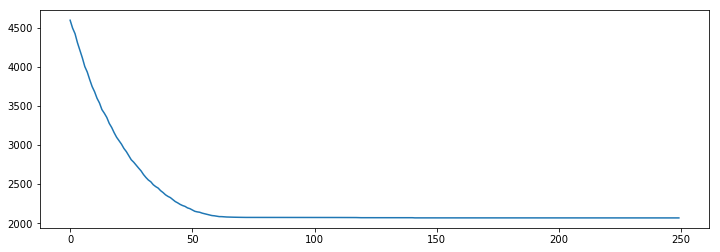

max_group_len = 10, Average min = 2086
Mutation ppb = 0.250000, Crossover ppb = 0.900000
('time', 75.34984183311462)
minimums: [2058.0, 2160.0, 2080.0, 2119.0, 2070.0, 2047.0, 2034.0, 2122.0, 2034.0, 2056.0, 2124.0, 2100.0, 2154.0, 2176.0, 2117.0, 2102.0, 2068.0, 2069.0, 2026.0, 2064.0, 2046.0, 2141.0, 2083.0, 2148.0, 2034.0, 2089.0, 2056.0, 2097.0, 2070.0, 2059.0]
total min = 2026.0


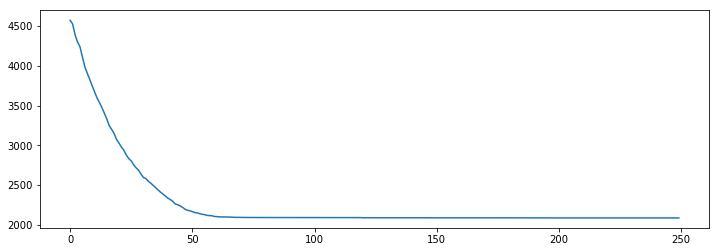

max_group_len = 10, Average min = 2082
Mutation ppb = 0.250000, Crossover ppb = 0.800000
('time', 71.95947313308716)
minimums: [2031.0, 2133.0, 2109.0, 2045.0, 2070.0, 2088.0, 2119.0, 2036.0, 2072.0, 2070.0, 2033.0, 2035.0, 2060.0, 2068.0, 2061.0, 2227.0, 2075.0, 2135.0, 2096.0, 2059.0, 2097.0, 2090.0, 2137.0, 2059.0, 2104.0, 2059.0, 2048.0, 2126.0, 2058.0, 2065.0]
total min = 2031.0


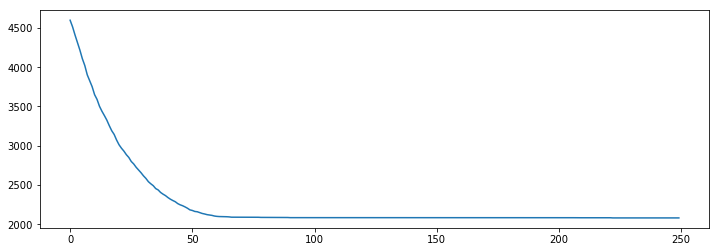

max_group_len = 10, Average min = 2076
Mutation ppb = 0.500000, Crossover ppb = 0.950000
('time', 102.67220902442932)
minimums: [2085.0, 2080.0, 2061.0, 2119.0, 2144.0, 2098.0, 2026.0, 2034.0, 2092.0, 2033.0, 2045.0, 2070.0, 2045.0, 2089.0, 2078.0, 2102.0, 2031.0, 2064.0, 2028.0, 2102.0, 2077.0, 2071.0, 2026.0, 2187.0, 2070.0, 2080.0, 2069.0, 2108.0, 2072.0, 2107.0]
total min = 2026.0


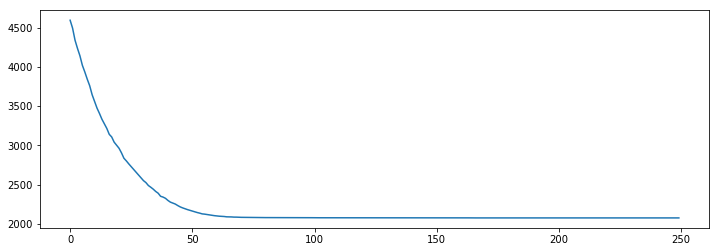

max_group_len = 10, Average min = 2071
Mutation ppb = 0.500000, Crossover ppb = 0.900000
('time', 101.48902606964111)
minimums: [2075.0, 2052.0, 2020.0, 2034.0, 2110.0, 2070.0, 2058.0, 2052.0, 2035.0, 2079.0, 2078.0, 2034.0, 2106.0, 2082.0, 2092.0, 2064.0, 2058.0, 2070.0, 2059.0, 2122.0, 2071.0, 2135.0, 2068.0, 2086.0, 2046.0, 2097.0, 2046.0, 2064.0, 2082.0, 2109.0]
total min = 2020.0


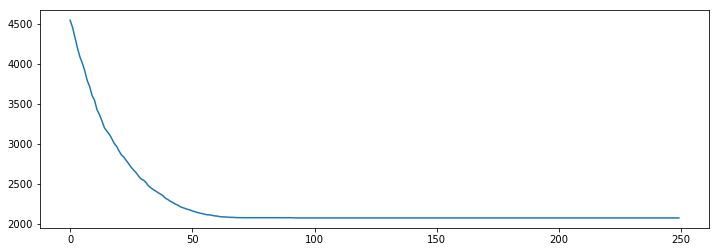

max_group_len = 10, Average min = 2069
Mutation ppb = 0.500000, Crossover ppb = 0.800000
('time', 98.50905299186707)
minimums: [2058.0, 2020.0, 2129.0, 2060.0, 2020.0, 2170.0, 2028.0, 2092.0, 2074.0, 2068.0, 2100.0, 2068.0, 2116.0, 2028.0, 2065.0, 2035.0, 2080.0, 2033.0, 2047.0, 2088.0, 2060.0, 2100.0, 2072.0, 2071.0, 2020.0, 2109.0, 2075.0, 2061.0, 2056.0, 2082.0]
total min = 2020.0


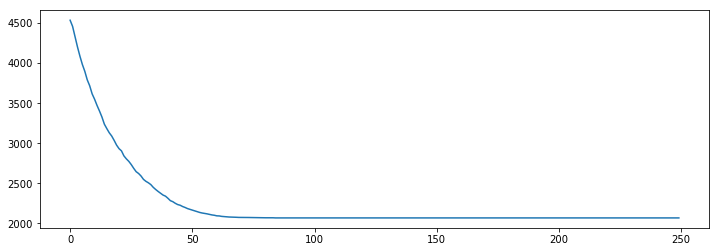

max_group_len = 10, Average min = 2065
Mutation ppb = 0.700000, Crossover ppb = 0.950000
('time', 123.54619479179382)
minimums: [2034.0, 2046.0, 2020.0, 2039.0, 2045.0, 2069.0, 2069.0, 2046.0, 2060.0, 2033.0, 2066.0, 2051.0, 2068.0, 2028.0, 2071.0, 2074.0, 2056.0, 2033.0, 2123.0, 2066.0, 2026.0, 2113.0, 2127.0, 2067.0, 2088.0, 2060.0, 2131.0, 2101.0, 2069.0, 2081.0]
total min = 2020.0


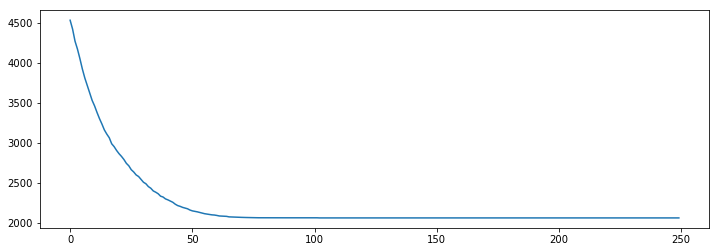

max_group_len = 10, Average min = 2069
Mutation ppb = 0.700000, Crossover ppb = 0.900000
('time', 122.01116895675659)
minimums: [2034.0, 2031.0, 2106.0, 2035.0, 2067.0, 2020.0, 2125.0, 2102.0, 2085.0, 2028.0, 2046.0, 2031.0, 2059.0, 2036.0, 2126.0, 2034.0, 2118.0, 2033.0, 2075.0, 2053.0, 2060.0, 2193.0, 2088.0, 2028.0, 2088.0, 2074.0, 2131.0, 2035.0, 2065.0, 2093.0]
total min = 2020.0


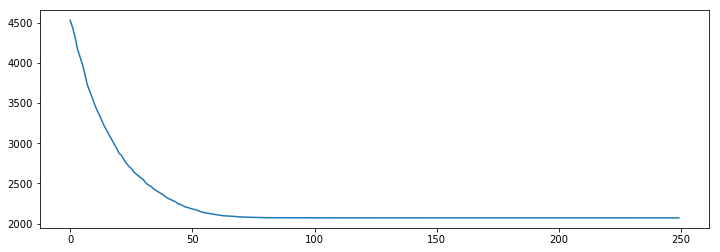

max_group_len = 10, Average min = 2056
Mutation ppb = 0.700000, Crossover ppb = 0.800000
('time', 118.80379700660706)
minimums: [2059.0, 2066.0, 2045.0, 2035.0, 2020.0, 2028.0, 2028.0, 2125.0, 2046.0, 2116.0, 2028.0, 2026.0, 2038.0, 2089.0, 2028.0, 2045.0, 2028.0, 2061.0, 2059.0, 2072.0, 2058.0, 2142.0, 2123.0, 2020.0, 2068.0, 2026.0, 2061.0, 2072.0, 2048.0, 2026.0]
total min = 2020.0


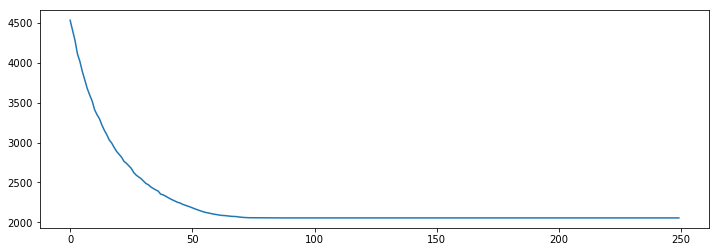

In [60]:
print("Cycle crossover")
for mgl in [10]:
    for m_ppb in [0.25, 0.5, 0.7]:
        for c_ppb in [0.95, 0.9, 0.8]:
            max_group_len = mgl
            cost_list = []
            t0 = time.time()
            for _ in range(30):
                cost_list.append(SGA(cross=CX, ppl_size=500, crossover_ppb=c_ppb, mutation_ppb=m_ppb, iters=250))
            
            costs = average_costs(cost_list)
            print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
            
            print("Mutation ppb = %f, Crossover ppb = %f" % (m_ppb, c_ppb))
            print('time',time.time() - t0)

            minimums = [cost.min() for cost in cost_list]
            print("minimums: " + str(minimums) )
            print("total min = " + str(min(minimums)))

            plt.figure(figsize=(12,4))
            plt.plot(costs)
            plt.show()
            

OX crossover
('time', 529.7731170654297)
max_group_len = 2, Average min = 2085
minimums: [2120.0, 2046.0, 2138.0, 2221.0, 2058.0, 2206.0, 2075.0, 2052.0, 2068.0, 2116.0, 2070.0, 2033.0, 2034.0, 2035.0, 2092.0, 2045.0, 2066.0, 2099.0, 2076.0, 2034.0, 2091.0, 2149.0, 2123.0, 2065.0, 2052.0, 2047.0, 2038.0, 2126.0, 2108.0, 2072.0]
total min = 2033.0


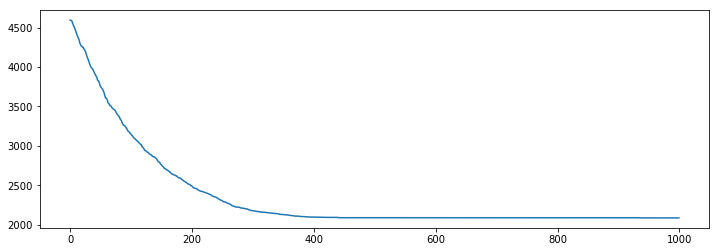

('time', 539.8293838500977)
max_group_len = 2, Average min = 2082
minimums: [2159.0, 2133.0, 2033.0, 2141.0, 2146.0, 2056.0, 2026.0, 2059.0, 2063.0, 2031.0, 2069.0, 2064.0, 2199.0, 2155.0, 2068.0, 2038.0, 2123.0, 2152.0, 2071.0, 2075.0, 2068.0, 2033.0, 2115.0, 2034.0, 2038.0, 2033.0, 2069.0, 2138.0, 2028.0, 2047.0]
total min = 2026.0


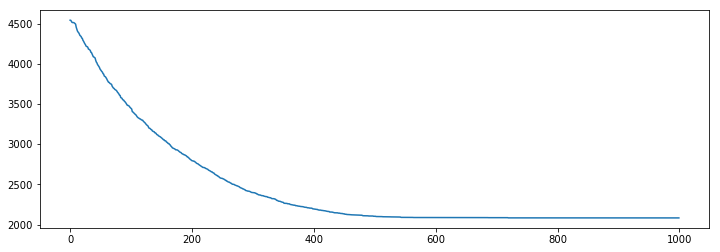

('time', 547.9801068305969)
max_group_len = 2, Average min = 2102
minimums: [2094.0, 2156.0, 2047.0, 2046.0, 2207.0, 2133.0, 2056.0, 2028.0, 2074.0, 2078.0, 2046.0, 2020.0, 2082.0, 2066.0, 2162.0, 2214.0, 2028.0, 2165.0, 2184.0, 2151.0, 2179.0, 2071.0, 2099.0, 2100.0, 2097.0, 2147.0, 2088.0, 2079.0, 2107.0, 2075.0]
total min = 2020.0


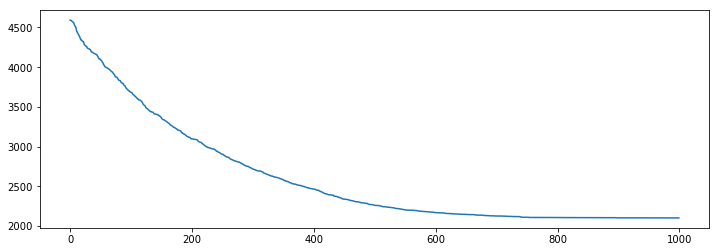

In [61]:
print("OX crossover")
for mgl in [2]:
    for c_ppb in [0.9, 0.93, 0.95]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(30):
            cost_list.append(SGA(ppl_size=500, crossover_ppb=c_ppb, mutation_ppb=0.25, iters=1000, cross=OX))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        

OX2 crossover
max_group_len = 2, Average min = 2082
('time', 622.4839909076691)
minimums: [2105.0, 2140.0, 2130.0, 2028.0, 2131.0, 2080.0, 2070.0, 2066.0, 2121.0, 2059.0, 2115.0, 2106.0, 2061.0, 2158.0, 2065.0, 2020.0, 2020.0, 2080.0, 2088.0, 2067.0, 2107.0, 2034.0, 2114.0, 2082.0, 2086.0, 2068.0, 2047.0, 2047.0, 2106.0, 2075.0]
total min = 2020.0


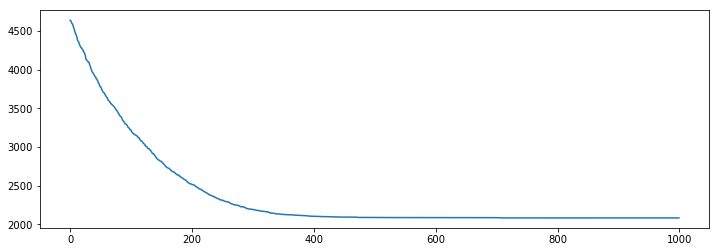

max_group_len = 2, Average min = 2090
('time', 638.0650949478149)
minimums: [2163.0, 2082.0, 2031.0, 2046.0, 2107.0, 2098.0, 2045.0, 2070.0, 2026.0, 2059.0, 2129.0, 2125.0, 2075.0, 2161.0, 2088.0, 2060.0, 2056.0, 2139.0, 2070.0, 2077.0, 2066.0, 2051.0, 2082.0, 2131.0, 2127.0, 2031.0, 2133.0, 2128.0, 2068.0, 2183.0]
total min = 2026.0


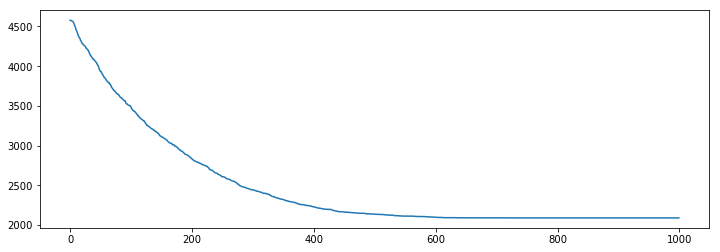

max_group_len = 2, Average min = 2088
('time', 650.3717339038849)
minimums: [2066.0, 2119.0, 2094.0, 2108.0, 2066.0, 2109.0, 2128.0, 2106.0, 2127.0, 2035.0, 2070.0, 2045.0, 2036.0, 2060.0, 2061.0, 2099.0, 2032.0, 2065.0, 2020.0, 2090.0, 2073.0, 2123.0, 2075.0, 2068.0, 2262.0, 2129.0, 2070.0, 2151.0, 2033.0, 2139.0]
total min = 2020.0


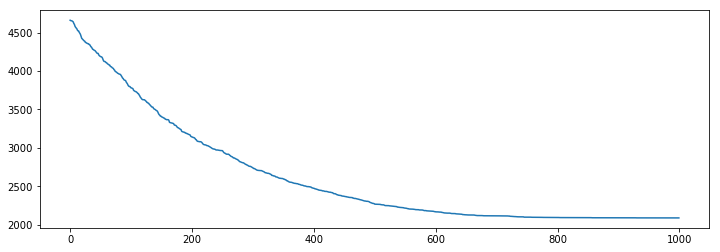

In [62]:
print("OX2 crossover")
for mgl in [2]:
    for c_ppb in [0.9, 0.93, 0.95]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(30):
            cost_list.append(SGA(ppl_size=500, crossover_ppb=c_ppb, mutation_ppb=0.25, iters=1000, cross=OX2))

        costs = average_costs(cost_list)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        print('time',time.time() - t0)
    
        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        

# Zad1 kroA100

In [63]:
# kroA100

n = 100
print('Problem size: %d' % n)


weights_string = """1 1380 939
2 2848 96
3 3510 1671
4 457 334
5 3888 666
6 984 965
7 2721 1482
8 1286 525
9 2716 1432
10 738 1325
11 1251 1832
12 2728 1698
13 3815 169
14 3683 1533
15 1247 1945
16 123 862
17 1234 1946
18 252 1240
19 611 673
20 2576 1676
21 928 1700
22 53 857
23 1807 1711
24 274 1420
25 2574 946
26 178 24
27 2678 1825
28 1795 962
29 3384 1498
30 3520 1079
31 1256 61
32 1424 1728
33 3913 192
34 3085 1528
35 2573 1969
36 463 1670
37 3875 598
38 298 1513
39 3479 821
40 2542 236
41 3955 1743
42 1323 280
43 3447 1830
44 2936 337
45 1621 1830
46 3373 1646
47 1393 1368
48 3874 1318
49 938 955
50 3022 474
51 2482 1183
52 3854 923
53 376 825
54 2519 135
55 2945 1622
56 953 268
57 2628 1479
58 2097 981
59 890 1846
60 2139 1806
61 2421 1007
62 2290 1810
63 1115 1052
64 2588 302
65 327 265
66 241 341
67 1917 687
68 2991 792
69 2573 599
70 19 674
71 3911 1673
72 872 1559
73 2863 558
74 929 1766
75 839 620
76 3893 102
77 2178 1619
78 3822 899
79 378 1048
80 1178 100
81 2599 901
82 3416 143
83 2961 1605
84 611 1384
85 3113 885
86 2597 1830
87 2586 1286
88 161 906
89 1429 134
90 742 1025
91 1625 1651
92 1187 706
93 1787 1009
94 22 987
95 3640 43
96 3756 882
97 776 392
98 1724 1642
99 198 1810
100 3950 1558"""

A = np.zeros((n, n))
import math
for row1, line1 in enumerate(weights_string.splitlines()):
    for row2, line2 in enumerate(weights_string.splitlines()):
        x1, y1 = int(line1.split()[1]), int(line1.split()[2])
        x2, y2 = int(line2.split()[1]), int(line2.split()[2])
        A[row1, row2] = math.sqrt((x1-x2)**2 + (y1-y2)**2)
print("Optimum distance: 21282")
#print('Distance matrix:\n', A)        

Problem size: 100
Optimum distance: 21282


PBX crossover
('time', 359.9397988319397)
max_group_len = 2, Average min = 23098
minimums: [22798.567102972094, 23205.704547286325, 24159.227495382023, 21851.239295896408, 23212.470318500407, 23261.594401865164, 23506.865151200887, 24009.202096918885, 22423.111927019185, 23139.776890868387, 23984.583254116489, 23258.060245442924, 22914.035078397152, 22223.886373422385, 22329.308624741232, 22771.935530617851, 22736.681503913027, 23124.939562630174, 22265.407511350153, 23228.702558507313, 23751.850177044827, 23038.641659855555, 23178.158757711244, 23698.353070726567, 23398.46749770498]
total min = 21851.2392959


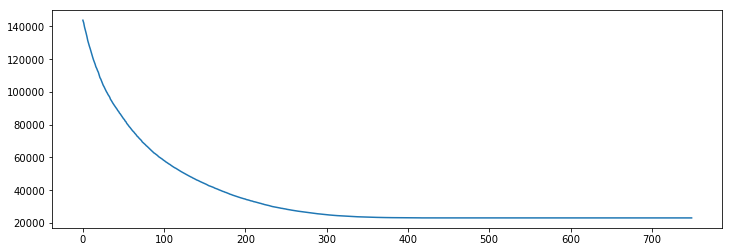

In [64]:
print("PBX crossover")
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(25):
        cost_list.append(SGA(ppl_size=1000, crossover_ppb=0.98, mutation_ppb=0.25, iters=750))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    

PBX crossover + local mutation
('time', 1750.7613911628723)
max_group_len = 2, Average min = 23537
minimums: [24365.027983297656, 23322.424134269851, 24867.940010006696, 23508.570379174729, 23362.615342950048, 23210.620979500854, 23186.135044625815, 21909.912213315318, 24114.939200972723, 24097.5804497953, 23094.941475447842, 23881.028114629626, 23637.739541156974, 23506.359978613407, 23678.969770106331, 24493.975617081011, 23383.735779812308, 23622.551438330556, 23736.421958002451, 23042.637755082542, 23885.353373997226, 22684.863814804266, 23802.266004192938, 22581.246140770032, 23471.564547083861]
total min = 21909.9122133


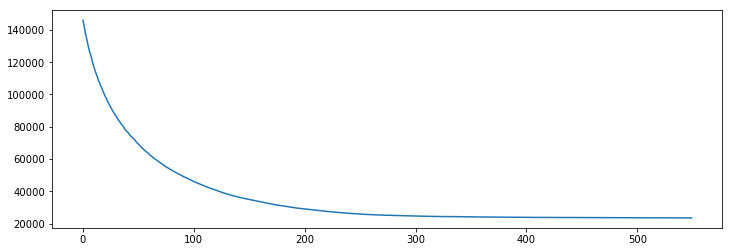

In [ ]:
print("PBX crossover + local mutation")
K = 2
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(25):
        cost_list.append(SGA(ppl_size=200, crossover_ppb=0.95, mutation_ppb=0.25, local_mutation_ppb=0.02, iters=550))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    

In [ ]:
print("PBX crossover + local iterative mutation")
K = 2
for mgl in [2]:
    for lmp in [0.02]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(25):
            cost_list.append(SGA(ppl_size=200, crossover_ppb=0.95, mutation_ppb=0.25, local_mutation_ppb=lmp, local_iterative=True, iters=550))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()

PBX crossover + local iterative mutation


In [ ]:
print("Cycle crossover")
for mgl in [10]:
    for m_ppb in [0.25]:
        for c_ppb in [0.95, 0.9]:
            max_group_len = mgl
            cost_list = []
            t0 = time.time()
            for _ in range(25):
                cost_list.append(SGA(cross=CX, ppl_size=1000, crossover_ppb=c_ppb, mutation_ppb=m_ppb, iters=750))
            
            costs = average_costs(cost_list)
            
            print("Mutation ppb = %f, Crossover ppb = %f" % (m_ppb, c_ppb))
            print('time',time.time() - t0)
            print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

            minimums = [cost.min() for cost in cost_list]
            print("minimums: " + str(minimums) )
            print("total min = " + str(min(minimums)))

            plt.figure(figsize=(12,4))
            plt.plot(costs)
            plt.show()
            

In [ ]:
print("OX crossover")
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(25):
        cost_list.append(SGA(ppl_size=1000, crossover_ppb=0.92, mutation_ppb=0.25, iters=900, cross=OX))
    
    costs = average_costs(cost_list)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    print('time',time.time() - t0)
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()
    

# Zad1 kroA150

In [297]:
# kroA150

n = 150
print('Problem size: %d' % n)


weights_string = """1 1380 939
2 2848 96
3 3510 1671
4 457 334
5 3888 666
6 984 965
7 2721 1482
8 1286 525
9 2716 1432
10 738 1325
11 1251 1832
12 2728 1698
13 3815 169
14 3683 1533
15 1247 1945
16 123 862
17 1234 1946
18 252 1240
19 611 673
20 2576 1676
21 928 1700
22 53 857
23 1807 1711
24 274 1420
25 2574 946
26 178 24
27 2678 1825
28 1795 962
29 3384 1498
30 3520 1079
31 1256 61
32 1424 1728
33 3913 192
34 3085 1528
35 2573 1969
36 463 1670
37 3875 598
38 298 1513
39 3479 821
40 2542 236
41 3955 1743
42 1323 280
43 3447 1830
44 2936 337
45 1621 1830
46 3373 1646
47 1393 1368
48 3874 1318
49 938 955
50 3022 474
51 2482 1183
52 3854 923
53 376 825
54 2519 135
55 2945 1622
56 953 268
57 2628 1479
58 2097 981
59 890 1846
60 2139 1806
61 2421 1007
62 2290 1810
63 1115 1052
64 2588 302
65 327 265
66 241 341
67 1917 687
68 2991 792
69 2573 599
70 19 674
71 3911 1673
72 872 1559
73 2863 558
74 929 1766
75 839 620
76 3893 102
77 2178 1619
78 3822 899
79 378 1048
80 1178 100
81 2599 901
82 3416 143
83 2961 1605
84 611 1384
85 3113 885
86 2597 1830
87 2586 1286
88 161 906
89 1429 134
90 742 1025
91 1625 1651
92 1187 706
93 1787 1009
94 22 987
95 3640 43
96 3756 882
97 776 392
98 1724 1642
99 198 1810
100 3950 1558
101 3477 949
102 91 1732
103 3972 329
104 198 1632
105 1806 733
106 538 1023
107 3430 1088
108 2186 766
109 1513 1646
110 2143 1611
111 53 1657
112 3404 1307
113 1034 1344
114 2823 376
115 3104 1931
116 3232 324
117 2790 1457
118 374 9
119 741 146
120 3083 1938
121 3502 1067
122 1280 237
123 3326 1846
124 217 38
125 2503 1172
126 3527 41
127 739 1850
128 3548 1999
129 48 154
130 1419 872
131 1689 1223
132 3468 1404
133 1628 253
134 382 872
135 3029 1242
136 3646 1758
137 285 1029
138 1782 93
139 1067 371
140 2849 1214
141 920 1835
142 1741 712
143 876 220
144 2753 283
145 2609 1286
146 3941 258
147 3613 523
148 1754 559
149 2916 1724
150 2445 1820"""

A = np.zeros((n, n))
import math
for row1, line1 in enumerate(weights_string.splitlines()):
    for row2, line2 in enumerate(weights_string.splitlines()):
        x1, y1 = int(line1.split()[1]), int(line1.split()[2])
        x2, y2 = int(line2.split()[1]), int(line2.split()[2])
        A[row1, row2] = math.sqrt((x1-x2)**2 + (y1-y2)**2)
print("Optimum distance: 26524")
#print('Distance matrix:\n', A)        

Problem size: 150
Optimum distance: 26524


(28770.153334576942, 32.52988910675049)


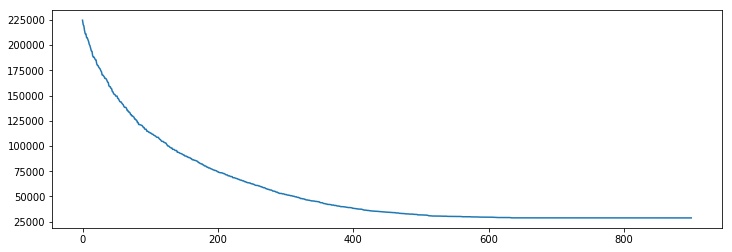

(28697.003944264379, 33.649877071380615)


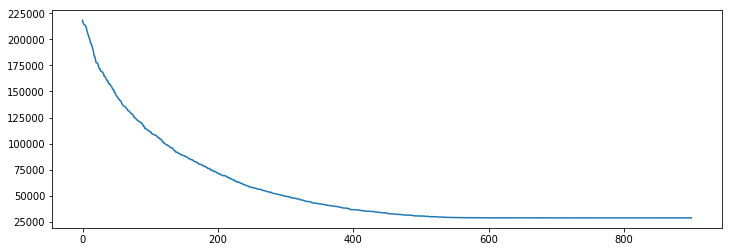

(29950.684598547741, 33.89297103881836)


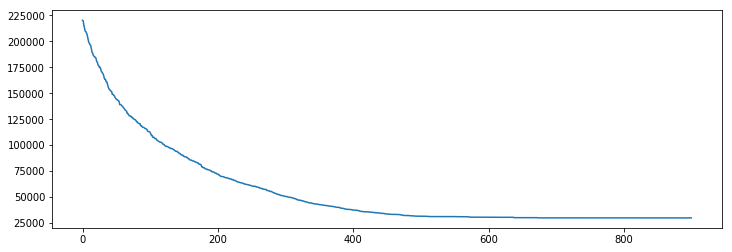

(28714.378175377809, 33.200507164001465)


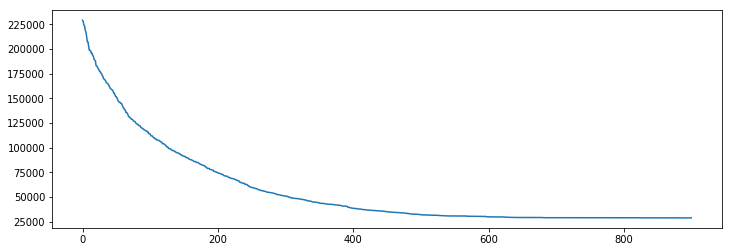

In [300]:
print("PBX crossover")
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(10):
        cost_list.append(SGA(ppl_size=2000, crossover_ppb=0.95, mutation_ppb=0.25, iters=900))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

30.5302019119
(208274.31899551785, array([146,  85,  48, 112,  79,  83, 116,  60,  82, 111, 127,  62,  63,
       120,  80,  71,  91,  30,  90, 122, 105,  25,  16, 148, 144,   0,
       101,  69,   9,  92,  72,  12,  29,   5,  22, 131,  40, 145,  87,
       136, 104,  42,  50,   2,  45,  24,  95,  96, 142, 138,  39,  43,
       119,  66, 121, 143, 137,  58, 130, 134, 106,  44, 108,  98,  37,
         8,  84,  56, 128,  61, 102,  75,  28, 115,  93, 117,  14,  38,
         3,  21, 129,  46,  47,   4,  64,  89,  27,  10, 123,  55,  32,
        77, 107, 103, 114,  19,  88, 141, 113,  11,  49,  31,   7,  18,
       132, 139,  57, 124,  78,  67, 140,  20,  86, 133,  97,  52, 126,
        73,  17,  76,  59,  34,  26,  35,   6,  94,  74,  15,  65,  68,
        53, 110,  23, 147,  41, 100,  70,  36,  13,  81, 118,  33, 135,
        54,  99,   1, 149, 109,  51, 125]))


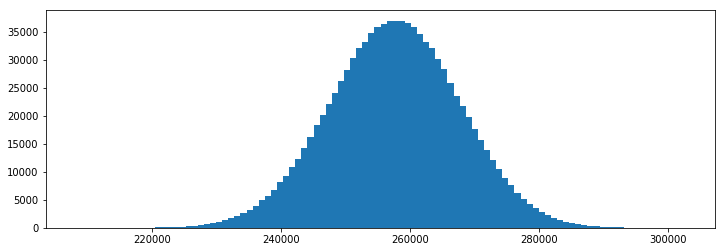

(257611.21303378177, 10107.152662533797)
31.2874858379
(207803.48616193651, array([110, 107, 105,   6, 137,  94, 125,   0,  43,  81, 104,  86,  70,
       100,  84,  12,  47,  40, 127,  97, 106,  72,  67, 130, 149,  28,
        59,  33,  30,  53,  32,  27, 143, 112,  91,  87,  15, 123, 108,
        76,   8, 120, 148, 118,  75,  50, 146,  95,  10,  31,   4,  29,
        11, 126,  41,  88,  68,  14,  19,  58,   9,  62,  36,  99,  60,
        49, 111,  69, 138,  64,   2,  82,  54, 114, 119,  21, 102, 124,
       145,   1,  52,  38,  85,  63,  51,  26,  80, 135, 141, 142,   5,
       131,  34, 144,  24,  23,  61, 116,  96,  98,  20, 117, 128, 115,
       122,  45,  77,  35, 101,  79,  89,  71,  17, 136,  18,  37,  55,
       134,  16,  42, 109, 147,  93,  92,  13, 113,  44,  22, 133,  48,
        39, 129,  78,  74,  56, 121,  46,  90, 139,  83,  66,  65,   7,
       103,  57,  73,  25, 132,   3, 140]))


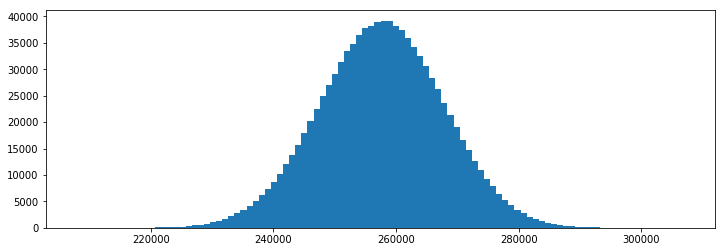

(257617.31744945049, 10105.141022421341)
32.2863969803
(207108.05960749762, array([113,  75,   4,  99, 118,  91,  53,   1,  14,  27,  68, 129, 142,
        73, 103,  94,  22, 124,  35,  89,  39,  88,  76, 133,  37,  28,
        57, 100,  49,   0,  85, 139,  86,  70,  17,  79,  93,  48,  15,
       137,  13, 135,  46,  84,  96, 101,  30,  36, 102, 125, 146,   6,
        44,  97,  72, 131,  50,   3,  87,  21, 138, 122,  38,  66, 128,
       117,  82,  60,  34,  43,  58,  23, 108,  32, 106,   2,  20,  42,
        40,   7, 141, 104, 114,  45,  80, 136,  65,  67,  62, 121,  90,
         8,  78,  64,   9, 110,  98,  55,  19, 109, 112,  31,  69, 123,
       148,  54,  26,  59, 134,  24, 107,   5,  51,  95, 127,  77,  11,
        18, 105, 140,  10, 111,  83,  16, 120,  52, 147, 130,  74, 149,
        56, 144,  41, 126, 119, 116,  81,  63,  33, 143, 145,  29,  61,
       115,  12, 132,  92,  71,  25,  47]))


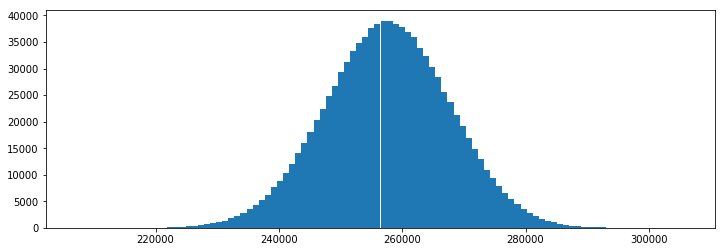

(257607.48322243462, 10123.194786091459)
31.6613690853
(209022.01563320187, array([126,  70, 100, 136,   7,  95,  47, 148,  76, 147,  81,  59,  18,
        23, 103,  30,  84,  12,  83,  98,  85,  75, 145,  36,  16, 113,
       137, 141,  14,  29, 139,  54,  72, 119, 110,  39, 134, 138,  46,
       117, 114,  65,  35,  89, 108,  24,  25,  21,  52,  80, 109,  63,
        57,  44,  50,  93,  64,  68, 116, 104, 140,  53, 102,  67,   4,
       121,  96,   0, 122,  60, 146,  38,  94,   8, 149,  11,  43,  90,
        73,  45,  97,   3,  79,  27,  20,  15, 118, 130,  78, 133,   5,
        61,  58,   1, 128,  71,  22,  40,  28,  33,  17,  87, 112,  62,
         2, 115, 107, 106,  34,  82, 132, 135, 131,  92,   6, 127,  88,
        51, 111, 144,  32, 120,  56,  26,  86, 143,  99,  77, 125, 123,
        48, 129,  10, 105, 124,  66,  49, 142, 101,  74,  69,  41,  91,
        13,  19,  42,  31,   9,  37,  55]))


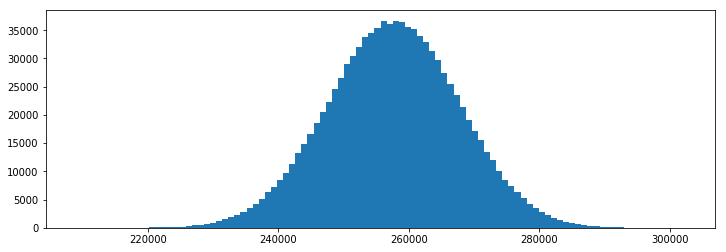

(257611.37763668312, 10104.228793210659)
31.3476750851
(204102.62264848387, array([ 36, 106, 100,  40,   4,  92,  97,  22, 118,  67, 129,  83, 140,
        91,  59,   7,  27,   3, 133,  15,  64, 117,  65,  74,  31,  48,
       113,  43, 119,  41,  46, 139, 110,  57,  30,  68,  19,  35,  37,
        95, 127,  80, 131,  82,  38, 111,  21,  69,   5,  78, 146,   1,
        71,  72,   2, 135,  86,  45,  54, 116,  70, 130,  79,   9, 142,
       112, 136, 123,  76,  51, 125,  13,   0,  10,  93,   6,  14,  24,
        75,  11,  44, 128, 143,  94, 147,  50, 114,   8,  29,  98, 115,
        99,  39,  89, 120, 145,  17, 105,  20,  52,  61,  85, 121, 124,
        77, 122, 109,  49,  60, 138, 103, 137, 149,  73,  66, 134, 107,
       132, 104,  62, 101,  23,  18,  53, 102,  88,  63,  55,  25, 108,
        26,  90,  16, 148,  96,  87, 141,  47,  32,  34,  12,  28,  84,
        58, 126, 144,  56,  42,  33,  81]))


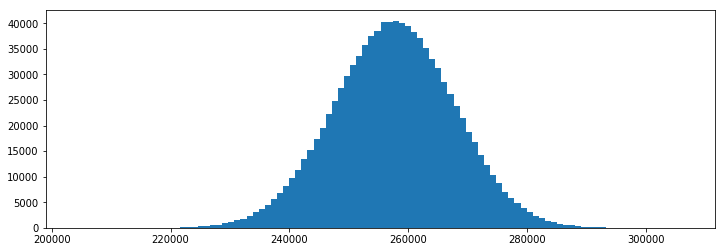

(257614.43671131218, 10103.145761946107)


In [301]:
for _ in range(5):
    t0 = time.time()

    T = 1000000

    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = tsp_objective_function(permutations[i, :])

    print(time.time() - t0)

    p = permutations[costs.argmin(), :]
    print(tsp_objective_function(p), p)
    
    plt.figure(figsize=(12,4))
    plt.hist(costs, bins=100)
    plt.show()

    print(costs.mean(), costs.std())

# Zad1 kroA200

In [303]:
# kroA200

n = 200
print('Problem size: %d' % n)


weights_string = """1 1357 1905
2 2650 802
3 1774 107
4 1307 964
5 3806 746
6 2687 1353
7 43 1957
8 3092 1668
9 185 1542
10 834 629
11 40 462
12 1183 1391
13 2048 1628
14 1097 643
15 1838 1732
16 234 1118
17 3314 1881
18 737 1285
19 779 777
20 2312 1949
21 2576 189
22 3078 1541
23 2781 478
24 705 1812
25 3409 1917
26 323 1714
27 1660 1556
28 3729 1188
29 693 1383
30 2361 640
31 2433 1538
32 554 1825
33 913 317
34 3586 1909
35 2636 727
36 1000 457
37 482 1337
38 3704 1082
39 3635 1174
40 1362 1526
41 2049 417
42 2552 1909
43 3939 640
44 219 898
45 812 351
46 901 1552
47 2513 1572
48 242 584
49 826 1226
50 3278 799
51 86 1065
52 14 454
53 1327 1893
54 2773 1286
55 2469 1838
56 3835 963
57 1031 428
58 3853 1712
59 1868 197
60 1544 863
61 457 1607
62 3174 1064
63 192 1004
64 2318 1925
65 2232 1374
66 396 828
67 2365 1649
68 2499 658
69 1410 307
70 2990 214
71 3646 1018
72 3394 1028
73 1779 90
74 1058 372
75 2933 1459
76 3099 173
77 2178 978
78 138 1610
79 2082 1753
80 2302 1127
81 805 272
82 22 1617
83 3213 1085
84 99 536
85 1533 1780
86 3564 676
87 29 6
88 3808 1375
89 2221 291
90 3499 1885
91 3124 408
92 781 671
93 1027 1041
94 3249 378
95 3297 491
96 213 220
97 721 186
98 3736 1542
99 868 731
100 960 303
101 1380 939
102 2848 96
103 3510 1671
104 457 334
105 3888 666
106 984 965
107 2721 1482
108 1286 525
109 2716 1432
110 738 1325
111 1251 1832
112 2728 1698
113 3815 169
114 3683 1533
115 1247 1945
116 123 862
117 1234 1946
118 252 1240
119 611 673
120 2576 1676
121 928 1700
122 53 857
123 1807 1711
124 274 1420
125 2574 946
126 178 24
127 2678 1825
128 1795 962
129 3384 1498
130 3520 1079
131 1256 61
132 1424 1728
133 3913 192
134 3085 1528
135 2573 1969
136 463 1670
137 3875 598
138 298 1513
139 3479 821
140 2542 236
141 3955 1743
142 1323 280
143 3447 1830
144 2936 337
145 1621 1830
146 3373 1646
147 1393 1368
148 3874 1318
149 938 955
150 3022 474
151 2482 1183
152 3854 923
153 376 825
154 2519 135
155 2945 1622
156 953 268
157 2628 1479
158 2097 981
159 890 1846
160 2139 1806
161 2421 1007
162 2290 1810
163 1115 1052
164 2588 302
165 327 265
166 241 341
167 1917 687
168 2991 792
169 2573 599
170 19 674
171 3911 1673
172 872 1559
173 2863 558
174 929 1766
175 839 620
176 3893 102
177 2178 1619
178 3822 899
179 378 1048
180 1178 100
181 2599 901
182 3416 143
183 2961 1605
184 611 1384
185 3113 885
186 2597 1830
187 2586 1286
188 161 906
189 1429 134
190 742 1025
191 1625 1651
192 1187 706
193 1787 1009
194 22 987
195 3640 43
196 3756 882
197 776 392
198 1724 1642
199 198 1810
200 3950 1558"""

A = np.zeros((n, n))
import math
for row1, line1 in enumerate(weights_string.splitlines()):
    for row2, line2 in enumerate(weights_string.splitlines()):
        x1, y1 = int(line1.split()[1]), int(line1.split()[2])
        x2, y2 = int(line2.split()[1]), int(line2.split()[2])
        A[row1, row2] = math.sqrt((x1-x2)**2 + (y1-y2)**2)
print("Optimum distance: 29368")
#print('Distance matrix:\n', A)        

Problem size: 200
Optimum distance: 29368


(31999.128680504778, 81.6368989944458)


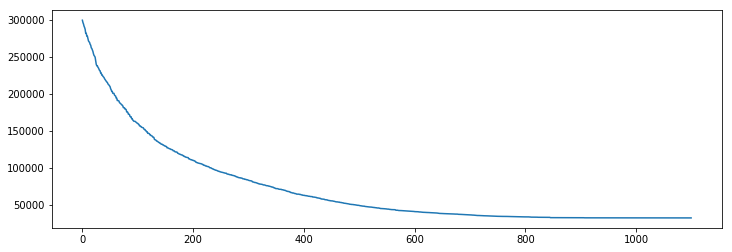

(32183.527192699821, 82.55861902236938)


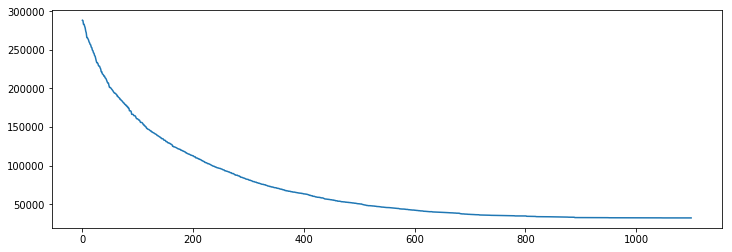

(32032.819751394301, 83.32418608665466)


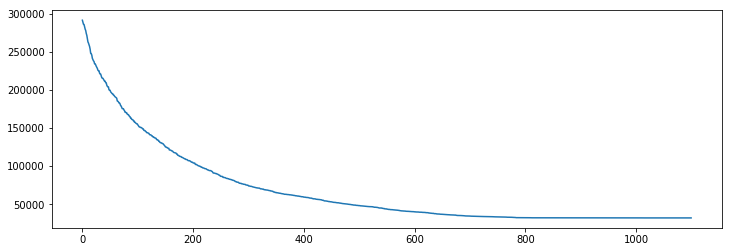

(31909.964396555792, 84.56060194969177)


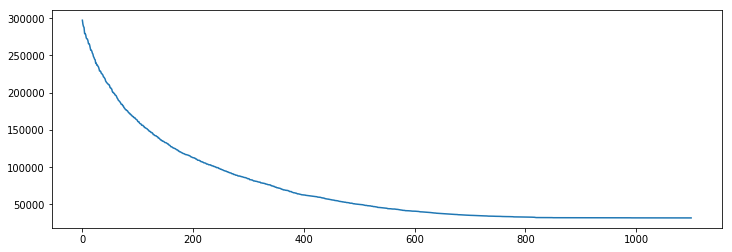

(32892.793764050402, 85.23638606071472)


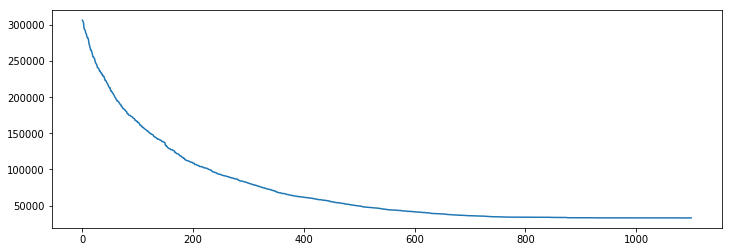

In [305]:
print("PBX crossover")
for mgl in [2]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(10):
        cost_list.append(SGA(ppl_size=2000, crossover_ppb=0.95, mutation_ppb=0.25, iters=1300))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Zad1 eil101

In [344]:
# eil101

n = 101
print('Problem size: %d' % n)


weights_string = """1 41 49
2 35 17
3 55 45
4 55 20
5 15 30
6 25 30
7 20 50
8 10 43
9 55 60
10 30 60
11 20 65
12 50 35
13 30 25
14 15 10
15 30 5
16 10 20
17 5 30
18 20 40
19 15 60
20 45 65
21 45 20
22 45 10
23 55 5
24 65 35
25 65 20
26 45 30
27 35 40
28 41 37
29 64 42
30 40 60
31 31 52
32 35 69
33 53 52
34 65 55
35 63 65
36 2 60
37 20 20
38 5 5
39 60 12
40 40 25
41 42 7
42 24 12
43 23 3
44 11 14
45 6 38
46 2 48
47 8 56
48 13 52
49 6 68
50 47 47
51 49 58
52 27 43
53 37 31
54 57 29
55 63 23
56 53 12
57 32 12
58 36 26
59 21 24
60 17 34
61 12 24
62 24 58
63 27 69
64 15 77
65 62 77
66 49 73
67 67 5
68 56 39
69 37 47
70 37 56
71 57 68
72 47 16
73 44 17
74 46 13
75 49 11
76 49 42
77 53 43
78 61 52
79 57 48
80 56 37
81 55 54
82 15 47
83 14 37
84 11 31
85 16 22
86 4 18
87 28 18
88 26 52
89 26 35
90 31 67
91 15 19
92 22 22
93 18 24
94 26 27
95 25 24
96 22 27
97 25 21
98 19 21
99 20 26
100 18 18
101 35 35"""

A = np.zeros((n, n))
import math

coords = np.zeros((n,2))
for row1, line1 in enumerate(weights_string.splitlines()):
    coords[row1,0] = int(line1.split()[1])
    coords[row1,1] = int(line1.split()[2])
coords.astype(int)        

for row1, line1 in enumerate(weights_string.splitlines()):
    for row2, line2 in enumerate(weights_string.splitlines()):
        x1, y1 = int(line1.split()[1]), int(line1.split()[2])
        x2, y2 = int(line2.split()[1]), int(line2.split()[2])
        A[row1, row2] = math.sqrt((x1-x2)**2 + (y1-y2)**2)
print("Optimum distance: 629")
#print('Distance matrix:\n', A)     


Problem size: 101
Optimum distance: 629


(709.08719052063759, 18.266494035720825)


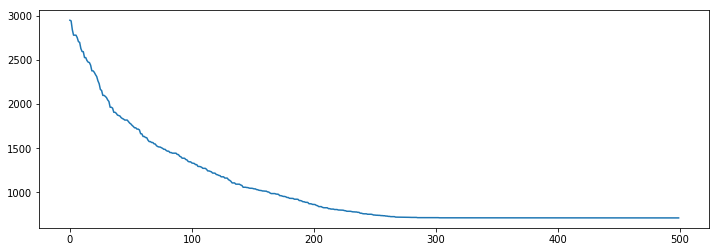

(689.35656790597352, 18.91199803352356)


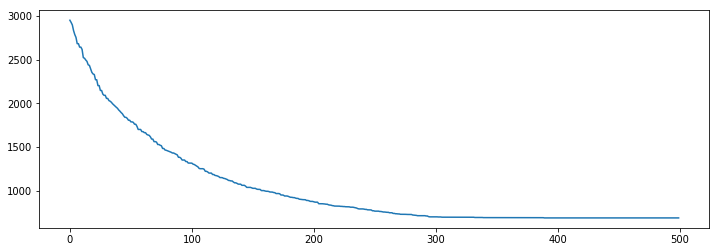

In [347]:

print("PBX crossover")
for mgl in [3]:
    max_group_len = mgl
    cost_list = []
    t0 = time.time()
    for _ in range(10):
        cost_list.append(SGA(ppl_size=1000, crossover_ppb=0.95, mutation_ppb=0.25, iters=500))
    
    costs = average_costs(cost_list)
    
    print('time',time.time() - t0)
    print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))
    
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    plt.figure(figsize=(12,4))
    plt.plot(costs)
    plt.show()

# Zad 4

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib

%matplotlib inline

In [10]:
Flow = None
Distance = None
n = 0

def load_qap_instance(url):    
    global Flow
    global Distance
    global n
    qap_instance_file = urllib.urlopen(url).read().split()
    
    n = int(qap_instance_file[0])
    
    Distance = np.empty((n, n))
    for i in range(n):
        Distance[i, :] = list(map(int, qap_instance_file[1+i*n:1+(i+1)*n]))
        
    Flow = np.empty((n, n))
    for i in range(n):
        Flow[i, :] = list(map(int, qap_instance_file[1+n*n+i*n:1+n*n+(i+1)*n]))

In [11]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (Flow[i, :] * Distance[p[i], p]).sum()
    return s

PBX crossover, problem:  Nug12
Optim = 578
32.8251681328
max_group_len = 2, Average min = 597


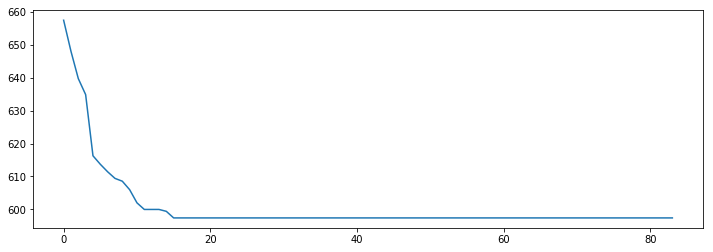

PBX crossover, problem:  Nug14
Optim = 1014
43.9198131561
max_group_len = 2, Average min = 1043


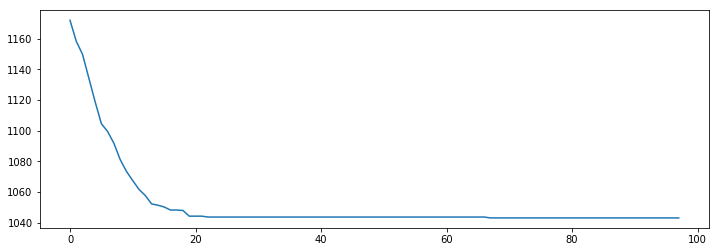

PBX crossover, problem:  Nug15
Optim = 1150
49.6671261787
max_group_len = 2, Average min = 1197


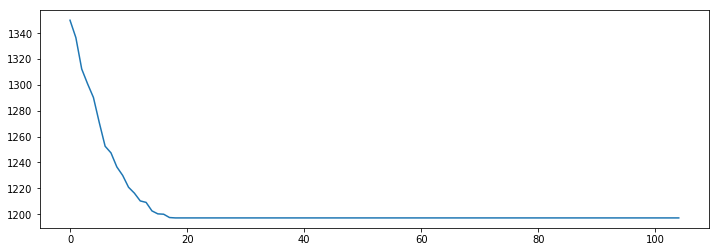

PBX crossover, problem:  Nug16a
Optim = 1610
55.7042372227
max_group_len = 2, Average min = 1672


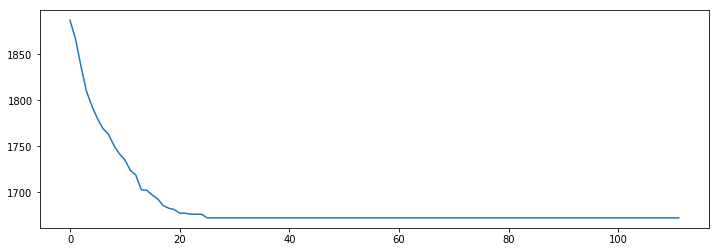

PBX crossover, problem:  Nug16b
Optim = 1240
56.3301010132
max_group_len = 2, Average min = 1292


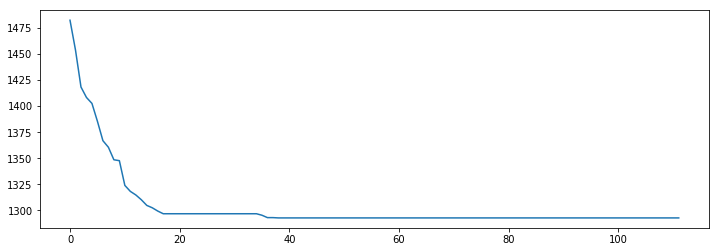

PBX crossover, problem:  Nug17
Optim = 1732
63.8612868786
max_group_len = 2, Average min = 1763


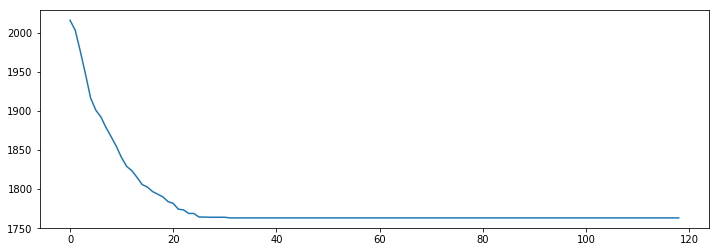

PBX crossover, problem:  Nug18
Optim = 1930
70.953979969
max_group_len = 2, Average min = 1984


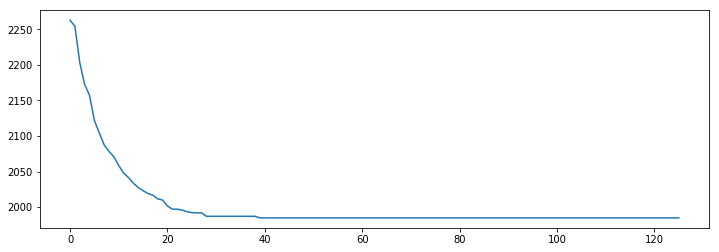

PBX crossover, problem:  Nug20
Optim = 2570
86.1413090229
max_group_len = 2, Average min = 2656


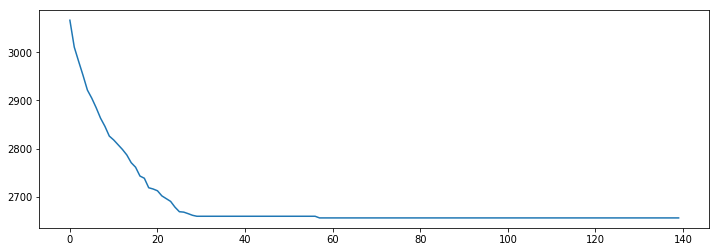

PBX crossover, problem:  Nug21
Optim = 2438
95.362336874
max_group_len = 2, Average min = 2493


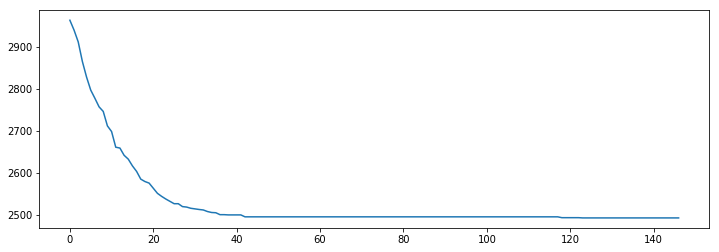

PBX crossover, problem:  Nug22
Optim = 3596
102.892678022
max_group_len = 2, Average min = 3683


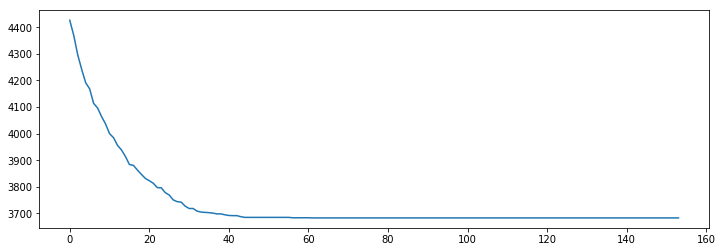

PBX crossover, problem:  Nug24
Optim = 3488
124.85581708
max_group_len = 2, Average min = 3644


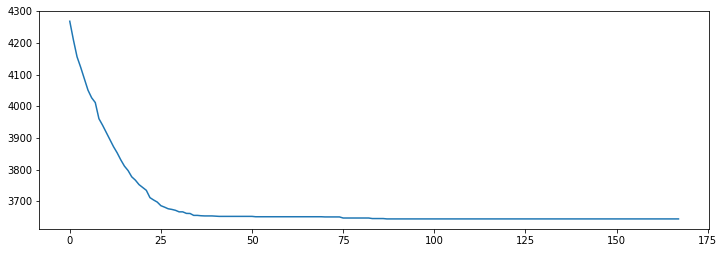

PBX crossover, problem:  Nug25
Optim = 3744
135.994240046
max_group_len = 2, Average min = 3842


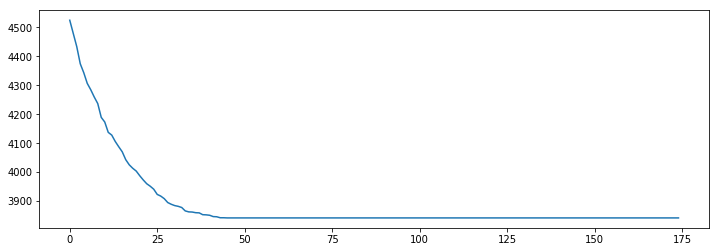

PBX crossover, problem:  Nug27
Optim = 5234
155.95558095
max_group_len = 2, Average min = 5418


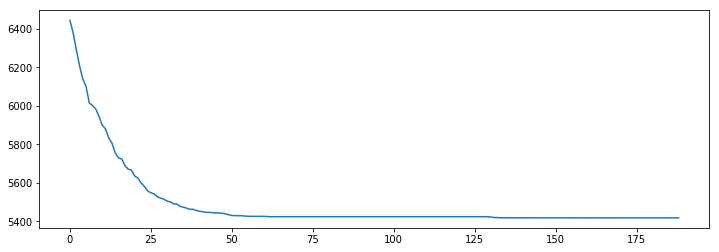

PBX crossover, problem:  Nug28
Optim = 5166
167.334384918
max_group_len = 2, Average min = 5360


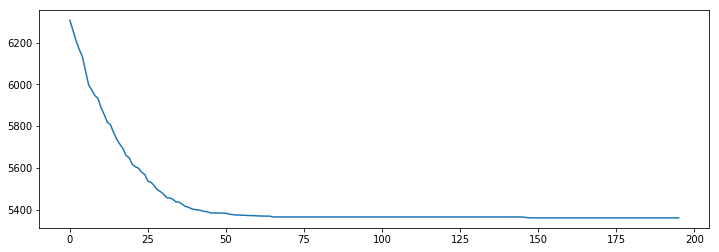

PBX crossover, problem:  Nug30
Optim = 6124
189.259282827
max_group_len = 2, Average min = 6334


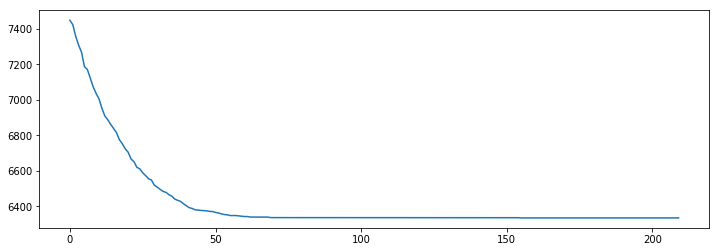

In [220]:
qap_instances = ['12', '14', '15', '16a', '16b', '17', '18', '20', '21', '22', '24', '25', '27', '28', '30']
qap_optims = [578, 1014, 1150, 1610, 1240, 1732, 1930, 2570, 2438, 3596, 3488, 3744, 5234, 5166, 6124]  

K = 2
for instance, optim in zip(qap_instances, qap_optims):
    
    QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug' + instance + '.dat'
    load_qap_instance(QAP_INSTANCE_URL)

    print("PBX crossover, problem:  Nug" + instance)
    print("Optim = " + str(optim))
    for mgl in [2]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(10):
            cost_list.append(SGA(mutation_function=transpose_sequence_mutation, n=n, \
                                 cost_function=qap_objective_function, ppl_size=50*n, crossover_ppb=0.8, \
                                 mutation_ppb=0.3, iters=7*n))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        

OX crossover, problem:  Nug12
Optim = 578
44.3132491112
max_group_len = 2, Average min = 606


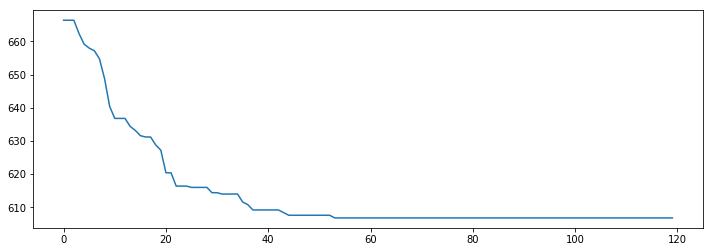

OX crossover, problem:  Nug14
Optim = 1014
57.2816369534
max_group_len = 2, Average min = 1048


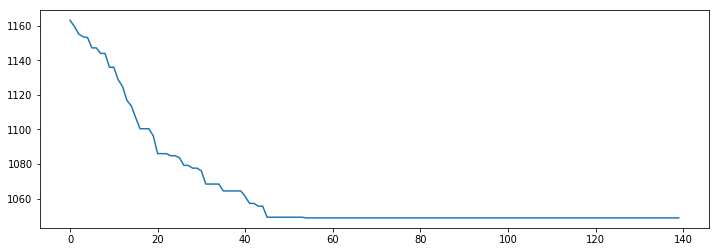

OX crossover, problem:  Nug15
Optim = 1150
64.5311760902
max_group_len = 2, Average min = 1184


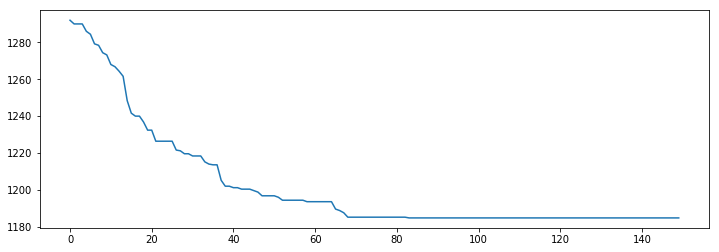

OX crossover, problem:  Nug16a
Optim = 1610
71.1959018707
max_group_len = 2, Average min = 1673


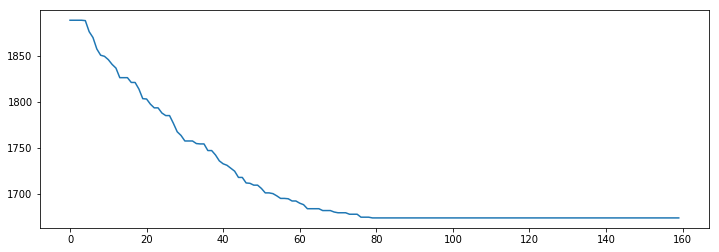

OX crossover, problem:  Nug16b
Optim = 1240
70.8403859138
max_group_len = 2, Average min = 1288


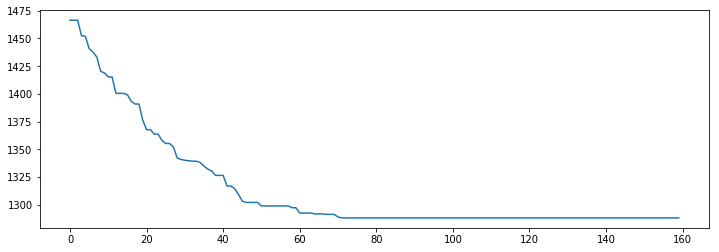

OX crossover, problem:  Nug17
Optim = 1732
80.9574620724
max_group_len = 2, Average min = 1800


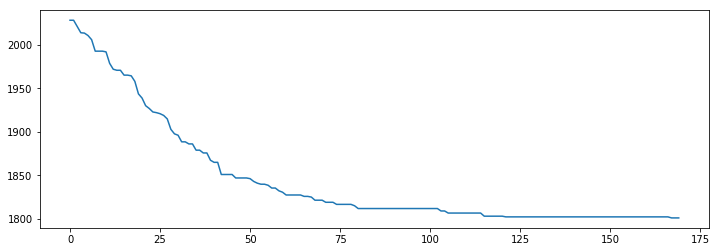

OX crossover, problem:  Nug18
Optim = 1930
88.0428590775
max_group_len = 2, Average min = 1988


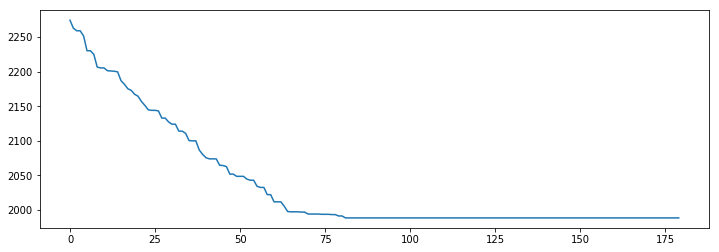

OX crossover, problem:  Nug20
Optim = 2570
103.080354214
max_group_len = 2, Average min = 2677


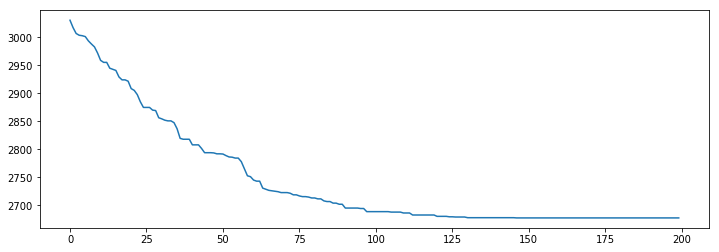

OX crossover, problem:  Nug21
Optim = 2438
114.143247843
max_group_len = 2, Average min = 2582


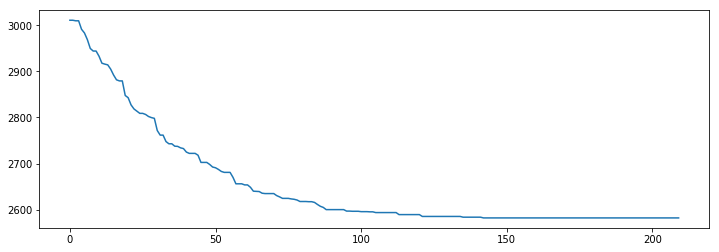

OX crossover, problem:  Nug22
Optim = 3596
126.178492069
max_group_len = 2, Average min = 3738


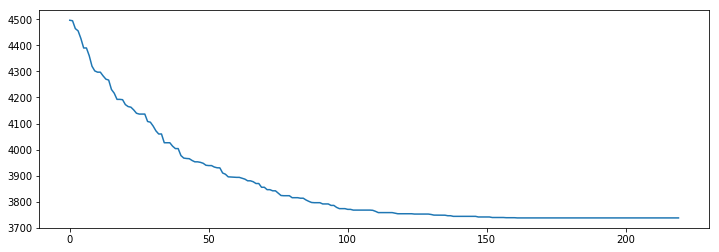

OX crossover, problem:  Nug24
Optim = 3488
147.830685139
max_group_len = 2, Average min = 3616


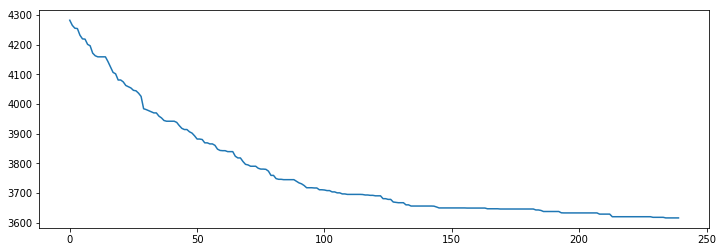

OX crossover, problem:  Nug25
Optim = 3744
157.926297903
max_group_len = 2, Average min = 3874


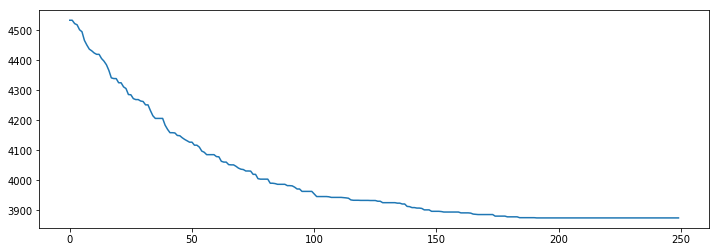

OX crossover, problem:  Nug27
Optim = 5234
181.529859066
max_group_len = 2, Average min = 5413


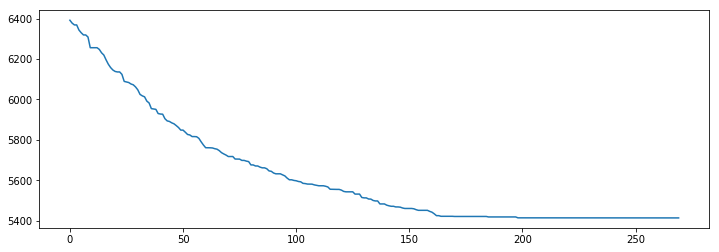

OX crossover, problem:  Nug28
Optim = 5166
190.628858805
max_group_len = 2, Average min = 5419


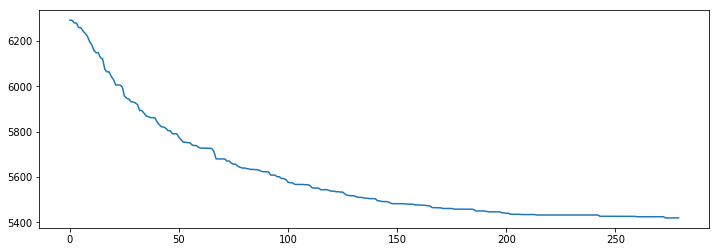

In [225]:
qap_instances = ['12', '14', '15', '16a', '16b', '17', '18', '20', '21', '22', '24', '25', '27', '28']
qap_optims = [578, 1014, 1150, 1610, 1240, 1732, 1930, 2570, 2438, 3596, 3488, 3744, 5234, 5166]  

K = 2
for instance, optim in zip(qap_instances, qap_optims):
    
    QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug' + instance + '.dat'
    load_qap_instance(QAP_INSTANCE_URL)

    print("OX crossover, problem:  Nug" + instance)
    print("Optim = " + str(optim))
    for mgl in [2]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(10):
            cost_list.append(SGA(mutation_function=transpose_sequence_mutation, n=n, \
                                 cost_function=qap_objective_function, ppl_size=50*n, crossover_ppb=0.8, \
                                 mutation_ppb=0.2, iters=11*n, cross=OX2))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        

PBX crossover, local iterative mutation, problem:  Nug12
Optim = 578
20.0220890045
max_group_len = 2, Average min = 586


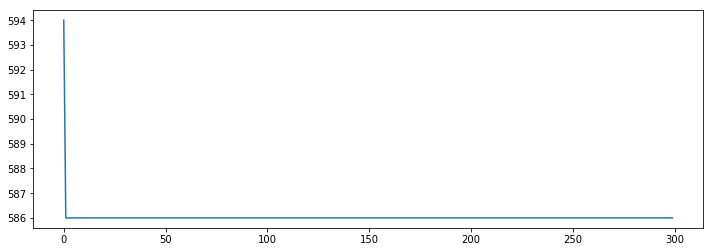

586.0
PBX crossover, local iterative mutation, problem:  Nug14
Optim = 1014
28.0511519909
max_group_len = 2, Average min = 1024


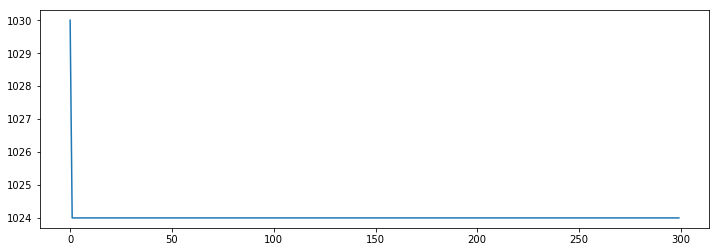

1024.0
PBX crossover, local iterative mutation, problem:  Nug15
Optim = 1150
33.2895638943
max_group_len = 2, Average min = 1156


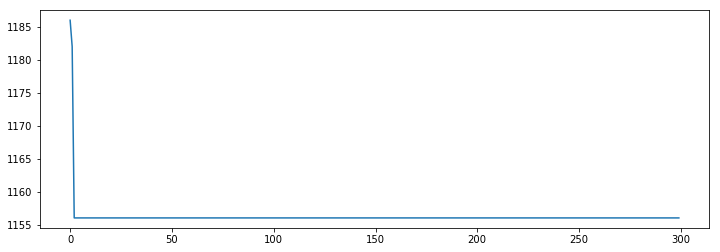

1156.0
PBX crossover, local iterative mutation, problem:  Nug16a
Optim = 1610
38.9795510769
max_group_len = 2, Average min = 1612


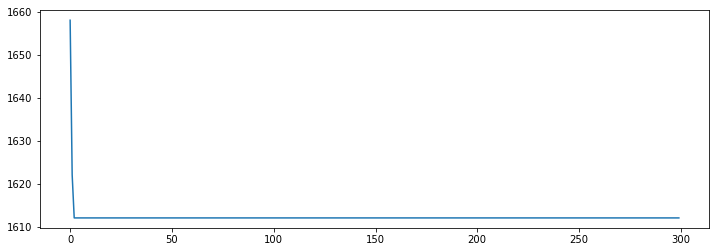

1612.0
PBX crossover, local iterative mutation, problem:  Nug16b
Optim = 1240
38.9590160847
max_group_len = 2, Average min = 1240


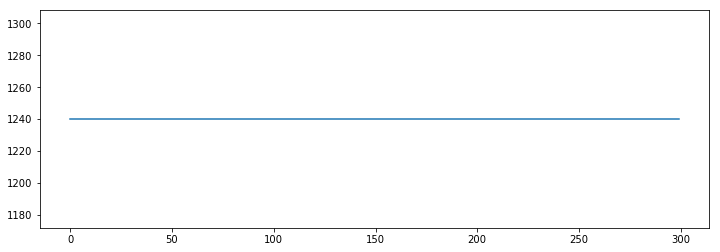

1240.0
PBX crossover, local iterative mutation, problem:  Nug17
Optim = 1732
45.9658708572
max_group_len = 2, Average min = 1750


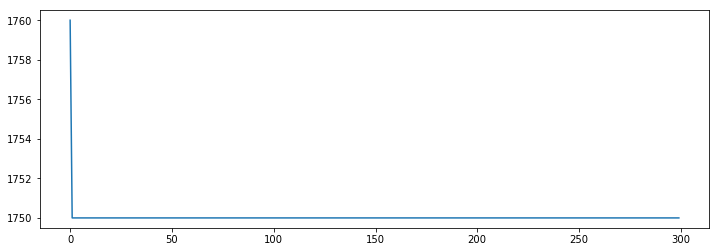

1750.0
PBX crossover, local iterative mutation, problem:  Nug18
Optim = 1930
52.5669620037
max_group_len = 2, Average min = 1948


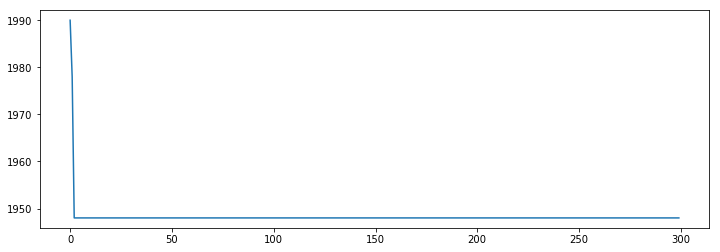

1948.0
PBX crossover, local iterative mutation, problem:  Nug20
Optim = 2570
68.2627820969
max_group_len = 2, Average min = 2622


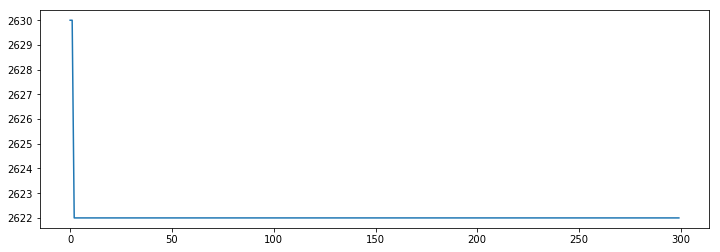

2622.0
PBX crossover, local iterative mutation, problem:  Nug21
Optim = 2438
80.1068630219
max_group_len = 2, Average min = 2480


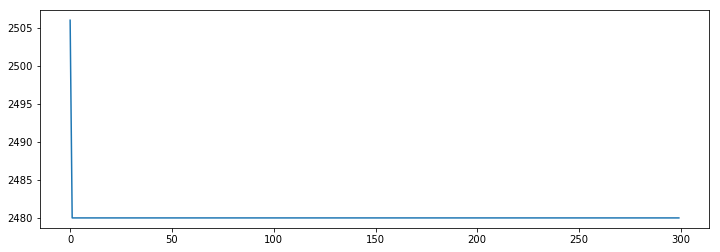

2480.0
PBX crossover, local iterative mutation, problem:  Nug22
Optim = 3596
91.1600880623
max_group_len = 2, Average min = 3610


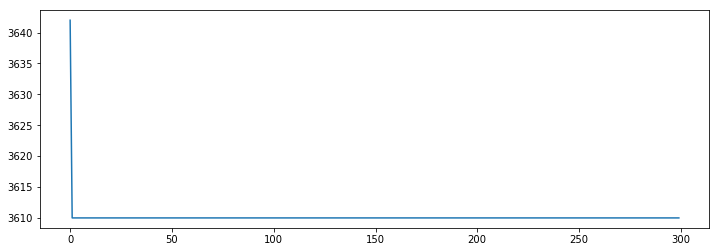

3610.0
PBX crossover, local iterative mutation, problem:  Nug24
Optim = 3488
120.568771124
max_group_len = 2, Average min = 3538


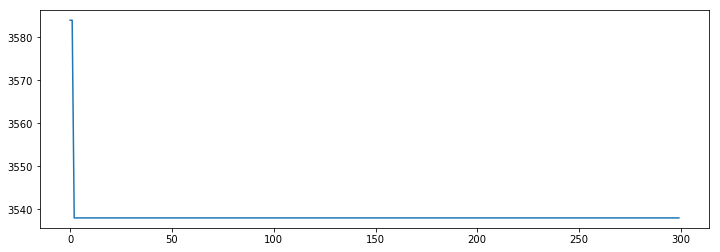

3538.0
PBX crossover, local iterative mutation, problem:  Nug25
Optim = 3744
134.795951128
max_group_len = 2, Average min = 3744


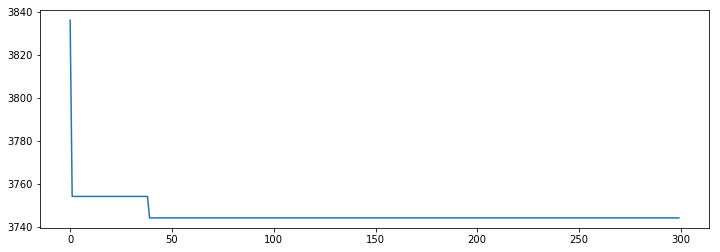

3744.0
PBX crossover, local iterative mutation, problem:  Nug27
Optim = 5234
167.95215106
max_group_len = 2, Average min = 5308


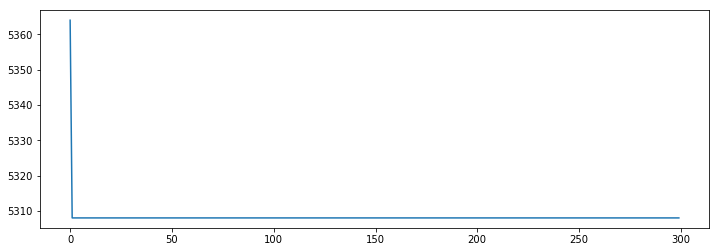

5308.0
PBX crossover, local iterative mutation, problem:  Nug28
Optim = 5166
178.424345016
max_group_len = 2, Average min = 5268


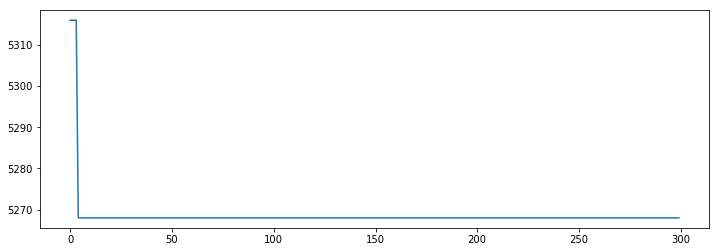

5268.0
PBX crossover, local iterative mutation, problem:  Nug30
Optim = 6124
217.330770969
max_group_len = 2, Average min = 6270


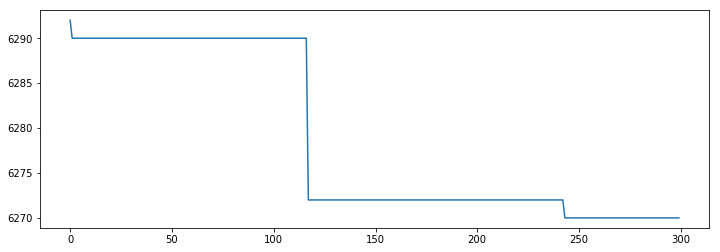

6270.0


In [14]:
qap_instances = ['12', '14', '15', '16a', '16b', '17', '18', '20', '21', '22', '24', '25', '27', '28', '30']
qap_optims = [578, 1014, 1150, 1610, 1240, 1732, 1930, 2570, 2438, 3596, 3488, 3744, 5234, 5166, 6124]  

K = 2
for instance, optim in zip(qap_instances, qap_optims):
    
    QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug' + instance + '.dat'
    load_qap_instance(QAP_INSTANCE_URL)

    print("PBX crossover, local iterative mutation, problem:  Nug" + instance)
    print("Optim = " + str(optim))
    for mgl in [2]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(1):
            cost_list.append(SGA(mutation_function=transpose_sequence_mutation, n=n, \
                                 cost_function=qap_objective_function, ppl_size=500, crossover_ppb=0.8, \
                                 mutation_ppb=0.2, local_iterative=True, local_mutation_ppb=0.02, iters=300))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        

PBX crossover, local iterative mutation, problem:  Nug12
Optim = 578
20.4444899559
max_group_len = 2, Average min = 578


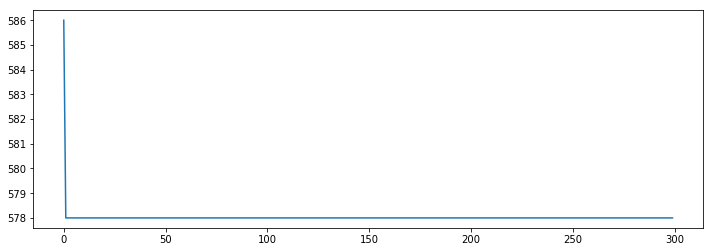

578.0
PBX crossover, local iterative mutation, problem:  Nug14
Optim = 1014
29.6127209663
max_group_len = 2, Average min = 1014


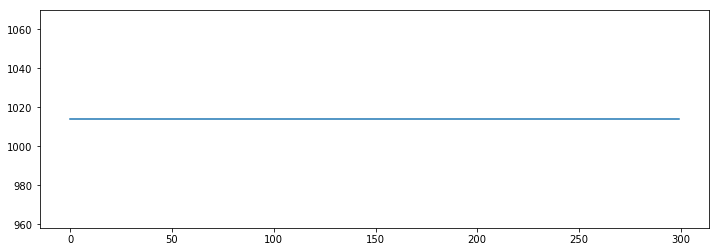

1014.0
PBX crossover, local iterative mutation, problem:  Nug15
Optim = 1150
33.9772479534
max_group_len = 2, Average min = 1160


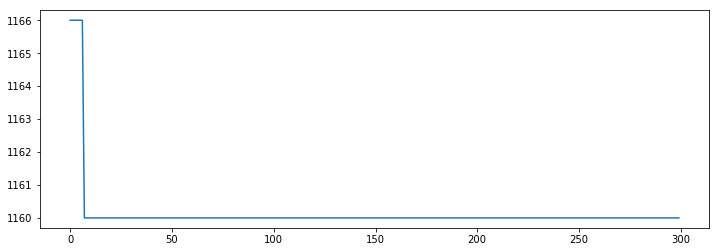

1160.0
PBX crossover, local iterative mutation, problem:  Nug16a
Optim = 1610
41.4381580353
max_group_len = 2, Average min = 1622


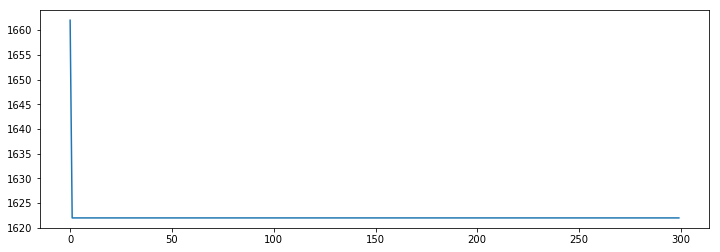

1622.0
PBX crossover, local iterative mutation, problem:  Nug16b
Optim = 1240
40.9424889088
max_group_len = 2, Average min = 1240


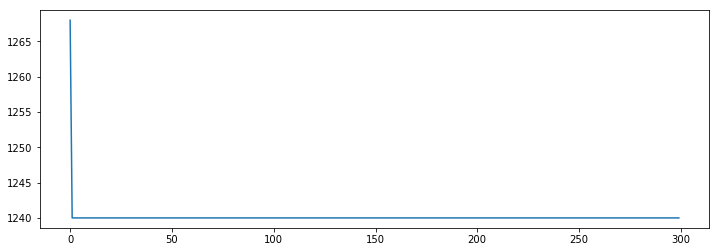

1240.0
PBX crossover, local iterative mutation, problem:  Nug17
Optim = 1732
47.087441206
max_group_len = 2, Average min = 1742


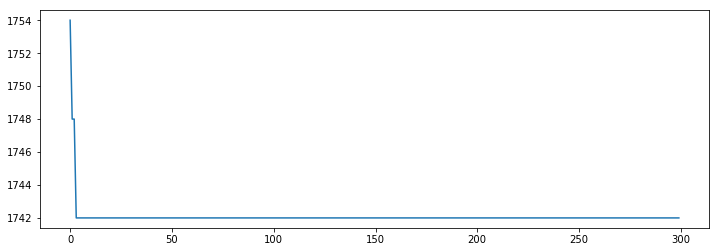

1742.0
PBX crossover, local iterative mutation, problem:  Nug18
Optim = 1930
54.8299911022
max_group_len = 2, Average min = 1962


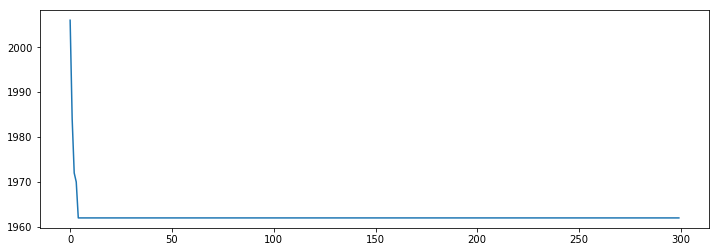

1962.0
PBX crossover, local iterative mutation, problem:  Nug20
Optim = 2570
74.2883439064
max_group_len = 2, Average min = 2602


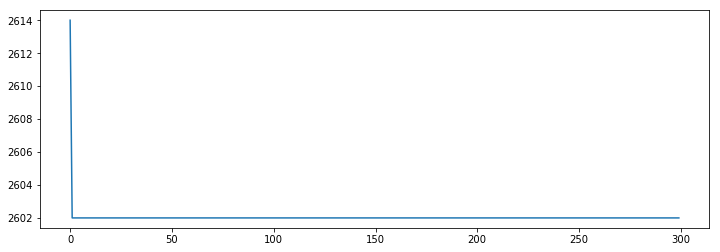

2602.0
PBX crossover, local iterative mutation, problem:  Nug21
Optim = 2438
86.4429268837
max_group_len = 2, Average min = 2464


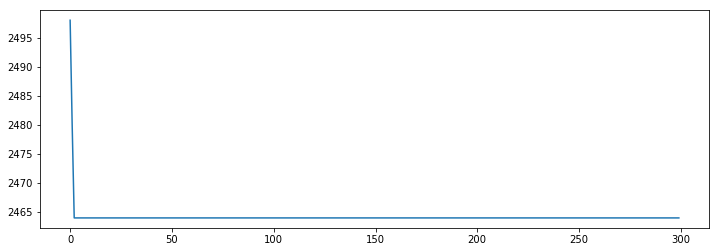

2464.0
PBX crossover, local iterative mutation, problem:  Nug22
Optim = 3596
99.380603075
max_group_len = 2, Average min = 3614


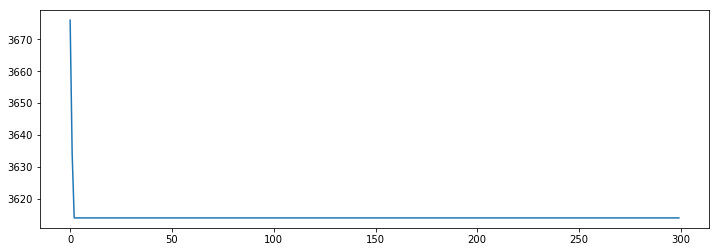

3614.0
PBX crossover, local iterative mutation, problem:  Nug24
Optim = 3488
129.819286108
max_group_len = 2, Average min = 3514


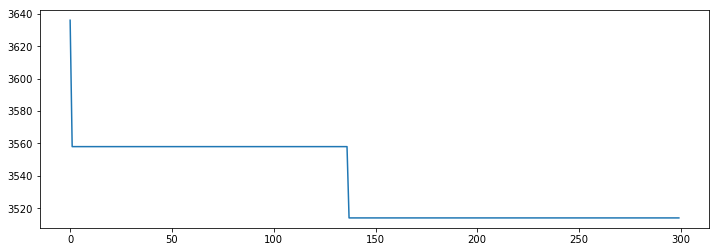

3514.0
PBX crossover, local iterative mutation, problem:  Nug25
Optim = 3744
141.465111017
max_group_len = 2, Average min = 3768


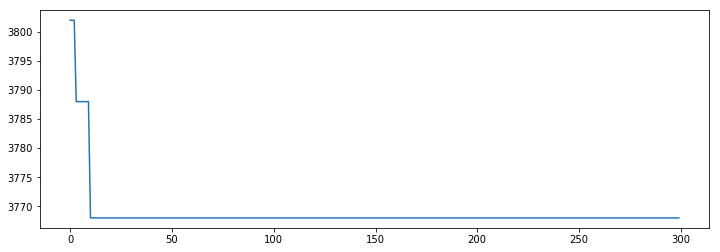

3768.0
PBX crossover, local iterative mutation, problem:  Nug27
Optim = 5234
181.81135416
max_group_len = 2, Average min = 5266


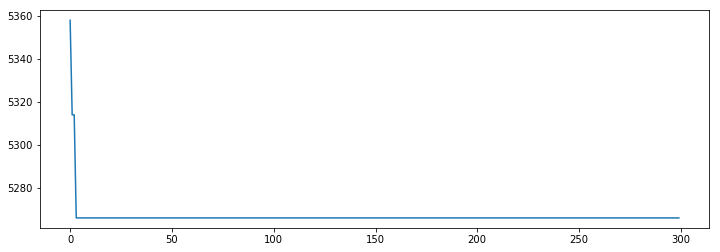

5266.0
PBX crossover, local iterative mutation, problem:  Nug28
Optim = 5166


KeyboardInterrupt: 

In [28]:
qap_instances = ['12', '14', '15', '16a', '16b', '17', '18', '20', '21', '22', '24', '25', '27', '28', '30']
qap_optims = [578, 1014, 1150, 1610, 1240, 1732, 1930, 2570, 2438, 3596, 3488, 3744, 5234, 5166, 6124]  

K = 2
for instance, optim in zip(qap_instances, qap_optims):
    
    QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug' + instance + '.dat'
    load_qap_instance(QAP_INSTANCE_URL)

    print("PBX crossover, local iterative mutation, problem:  Nug" + instance)
    print("Optim = " + str(optim))
    for mgl in [2]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(1):
            cost_list.append(SGA(mutation_function=transpose_sequence_mutation, n=n, \
                                 cost_function=qap_objective_function, ppl_size=500, crossover_ppb=0.8, \
                                 mutation_ppb=0.2, local_iterative=True, local_mutation_ppb=0.02, iters=300))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        

PBX crossover, problem:  Nug50a
Optim = 4938796
0.144936084747
max_group_len = 2, Average min = 5807702


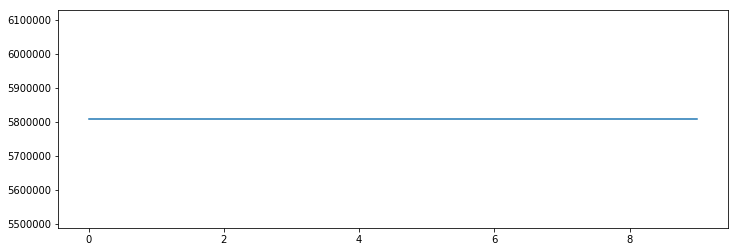

PBX crossover, problem:  Nug60a
Optim = 7205962
0.134120941162
max_group_len = 2, Average min = 8348134


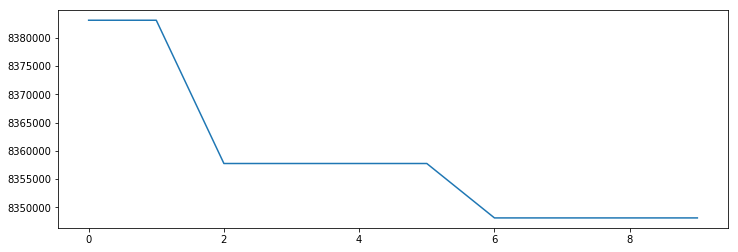

PBX crossover, problem:  Nug80a
Optim = 13499184
0.172528982162
max_group_len = 2, Average min = 15445030


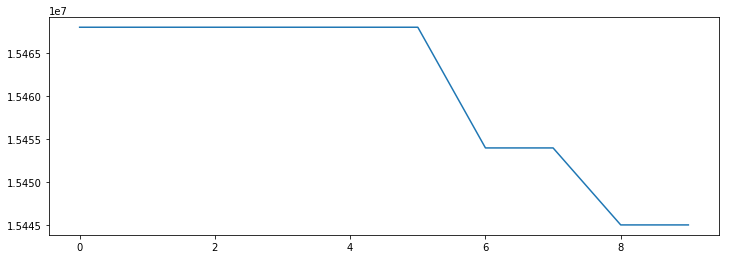

In [215]:
qap_instances = ['50a','60a', '80a']
qap_optims = [4938796, 7205962, 13499184]  

K = 2
for instance, optim in zip(qap_instances, qap_optims):
    
    QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/tai' + instance + '.dat'
    load_qap_instance2(QAP_INSTANCE_URL)

    print("PBX crossover, problem:  Tai" + instance)
    print("Optim = " + str(optim))
    for mgl in [2]:
        max_group_len = mgl
        cost_list = []
        t0 = time.time()
        for _ in range(1):
            cost_list.append(SGA(mutation_function=transpose_sequence_mutation, n=n, \
                                 cost_function=qap_objective_function, ppl_size=20, crossover_ppb=0.8, \
                                 mutation_ppb=0.2, iters=10, cross=OX2))

        costs = average_costs(cost_list)

        print('time',time.time() - t0)
        print("max_group_len = %d, Average min = %d" % (mgl, costs.min()))

        minimums = [cost.min() for cost in cost_list]
        print("minimums: " + str(minimums) )
        print("total min = " + str(min(minimums)))

        plt.figure(figsize=(12,4))
        plt.plot(costs)
        plt.show()
        